In [1]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr 


rsol = 6.96e10 #cm
msol = 1.989e33 #grams
lsol = 3.839e33 #ergs

In [2]:
##define the functions needed for 
def b1(z):
    return 14.38*(np.log10(z)**2) + 57.41*np.log10(z) + 95.68

def a2(z):
    return -16.91*(np.log10(z)**2) -81.93*np.log10(z) - 47.87

def b2(z):
    return 184.02*(np.log10(z)**2) + 872.19*np.log10(z) + 369.75

def c2(z):
    return -660.1*(np.log10(z)**2) - 3482.35*np.log10(z) + 1488.91


def M_conv_max_func(star_mass, M_core_max,gamma):
    return star_mass - (1+gamma)*M_core_max

def T_norm_func(logLTAMS, a2, b2 ,c2):
    return a2*logLTAMS**2 + b2*logLTAMS + c2

def M_conv_func(T_eff,T_norm,b1,M_conv_max):
    return M_conv_max/(1+np.exp(b1*((T_eff/T_norm)-1)))

def M_conv_new(T_eff, Tonset, Tmin, M_conv_max, param):
    return M_conv_max/(1+np.exp((-2*param*T_eff + param*Tmin + param*Tonset)/(Tmin - Tonset)))

gamma = 0.1

0
Z_compas = 0.03, M_i_compass = 8
3165.343590244244


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


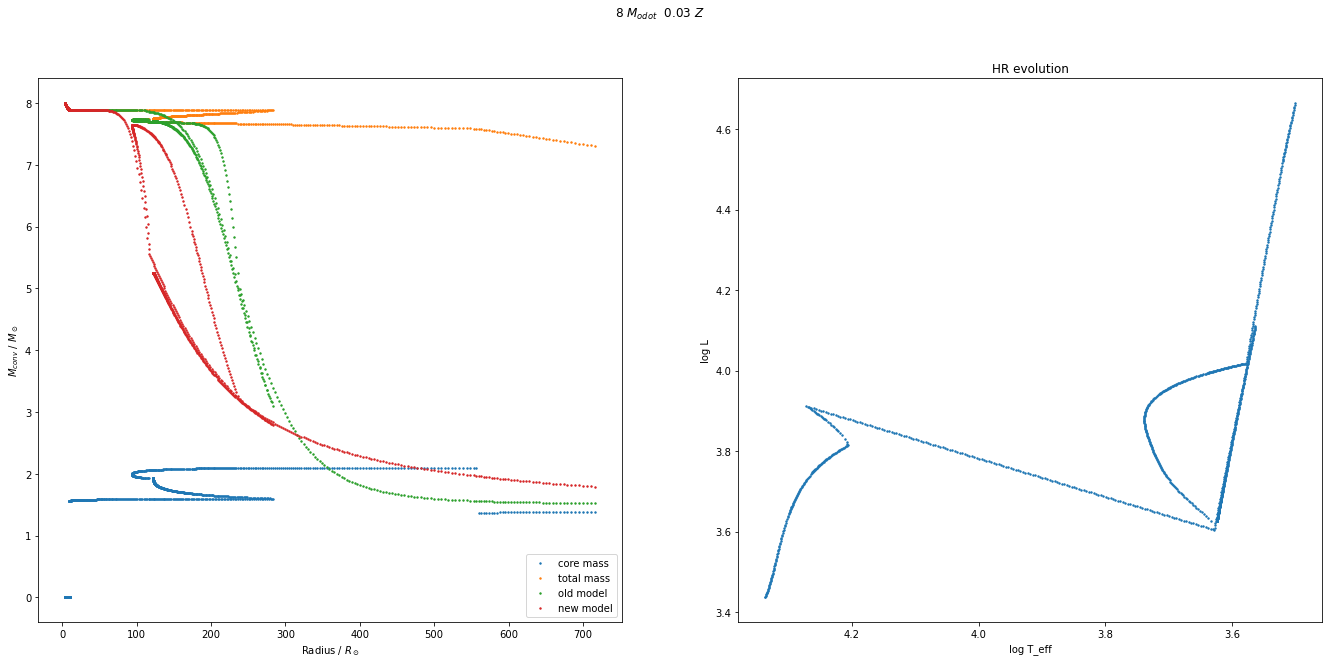

1
Z_compas = 0.03, M_i_compass = 12
3137.342683279272


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


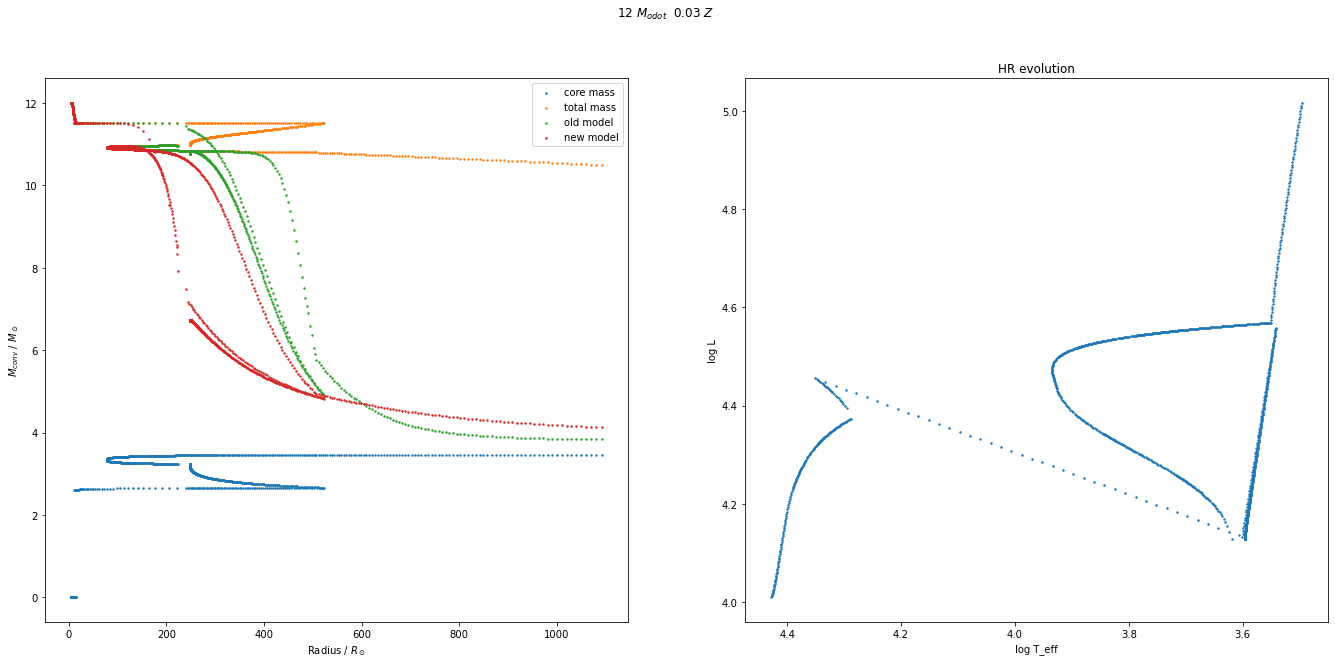

2
Z_compas = 0.03, M_i_compass = 16
2842.3707599443032


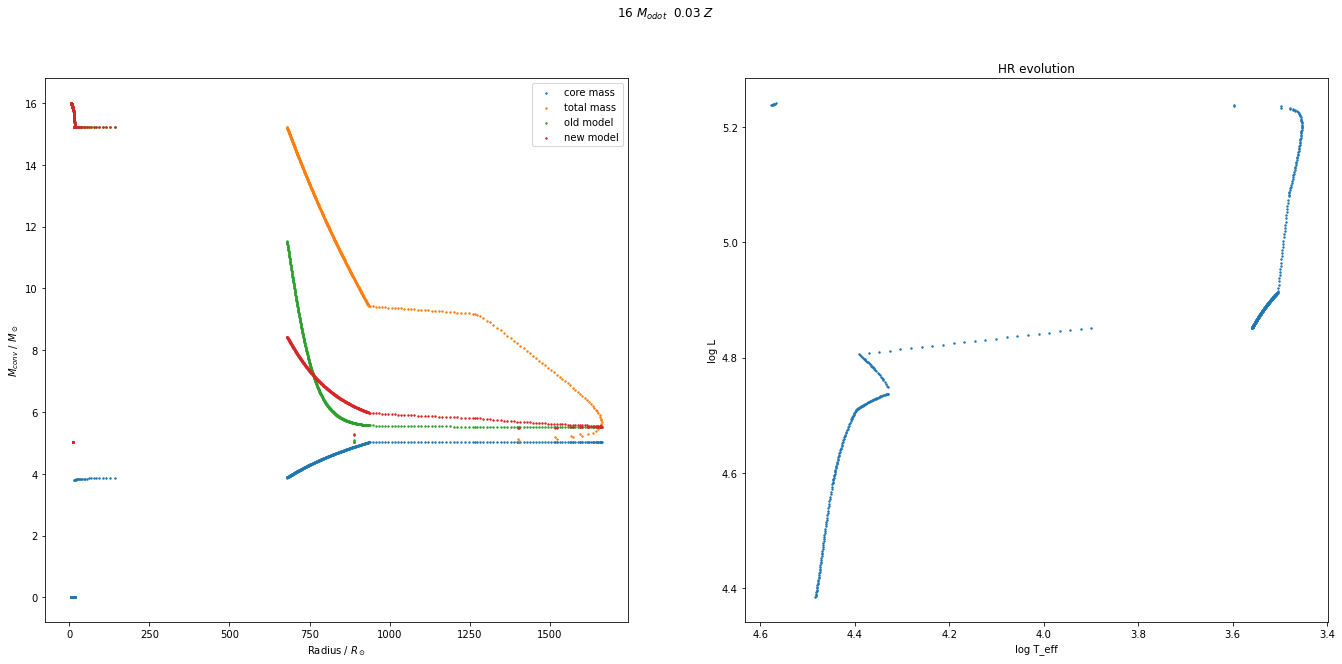

3
Z_compas = 0.03, M_i_compass = 20
3028.092910910487


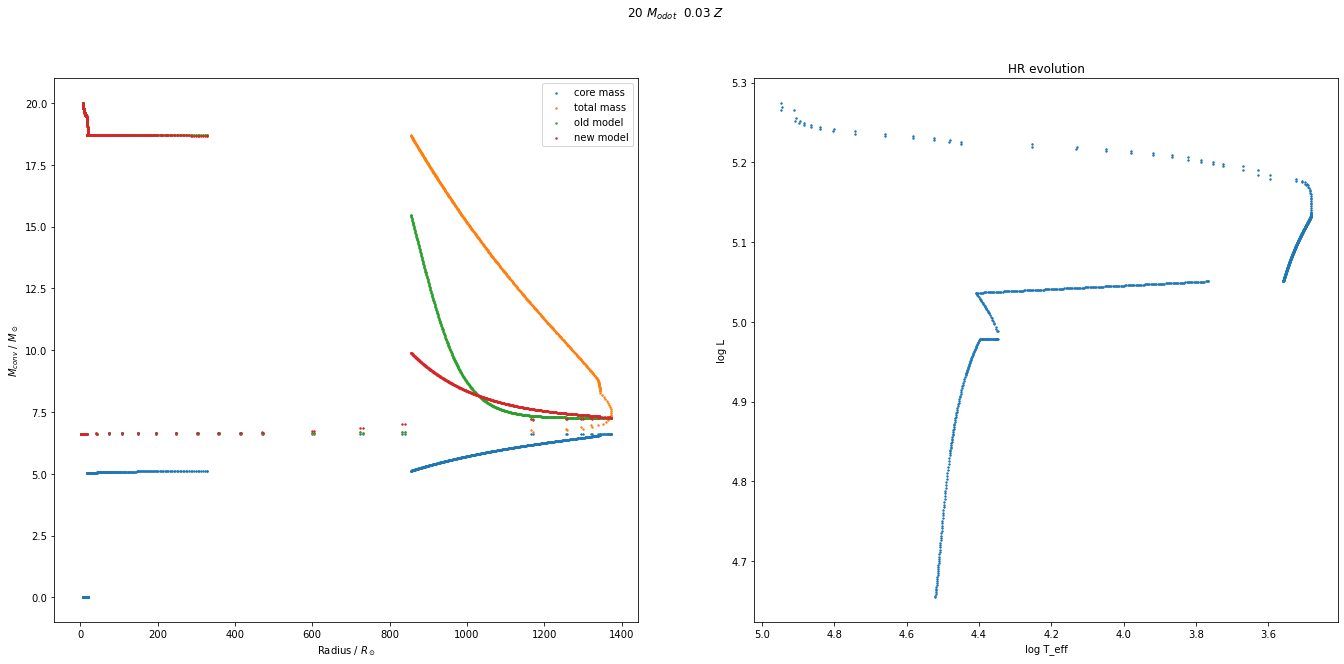

4
Z_compas = 0.03, M_i_compass = 24
3021.5987167587614


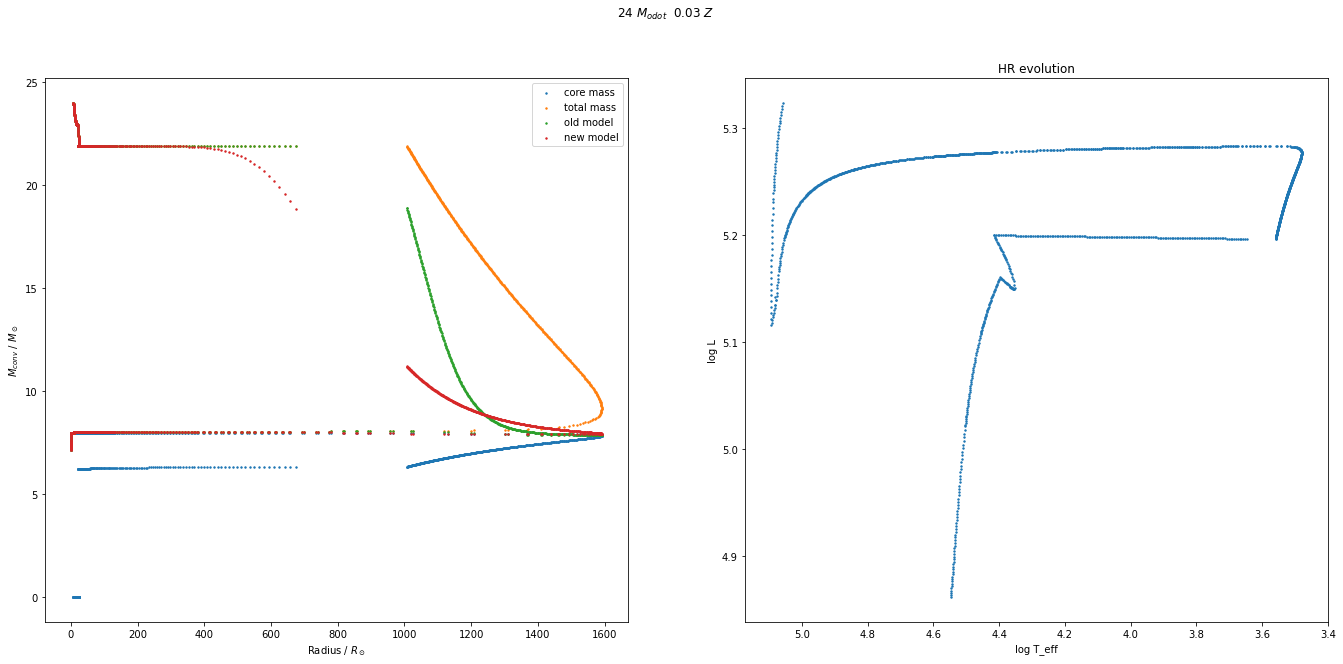

5
Z_compas = 0.0142, M_i_compass = 8
3676.960793690784


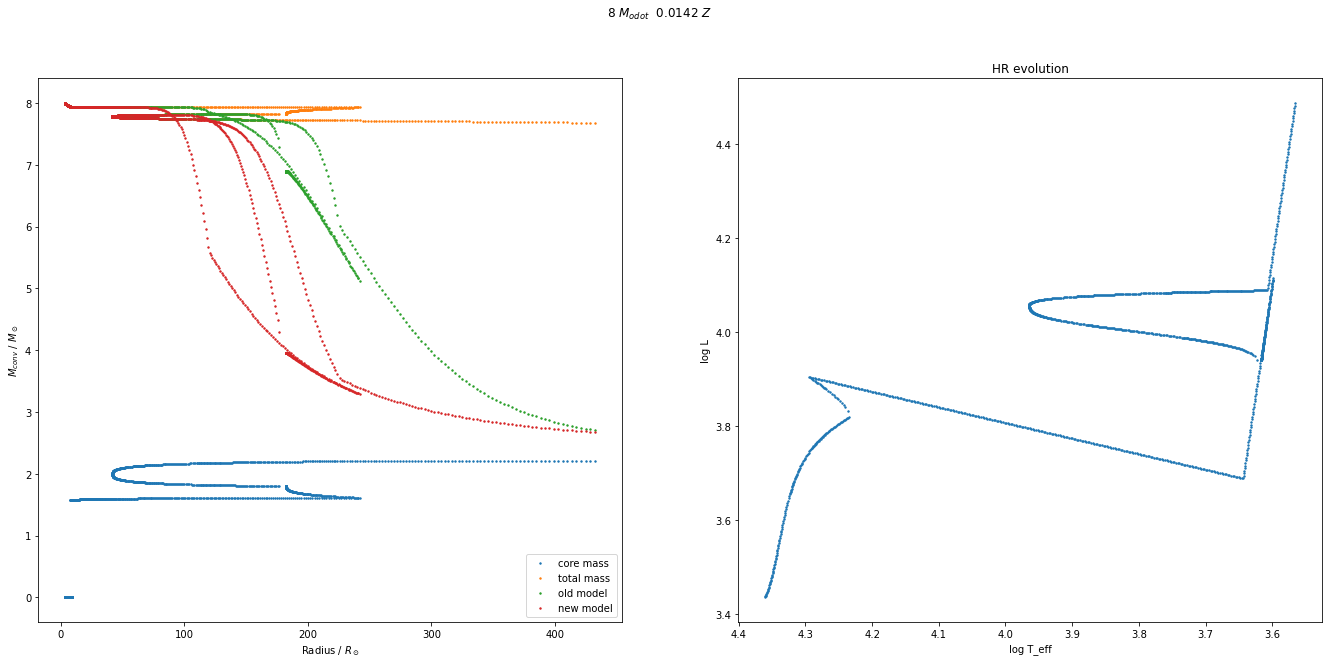

6
Z_compas = 0.0142, M_i_compass = 12
3489.359059797798


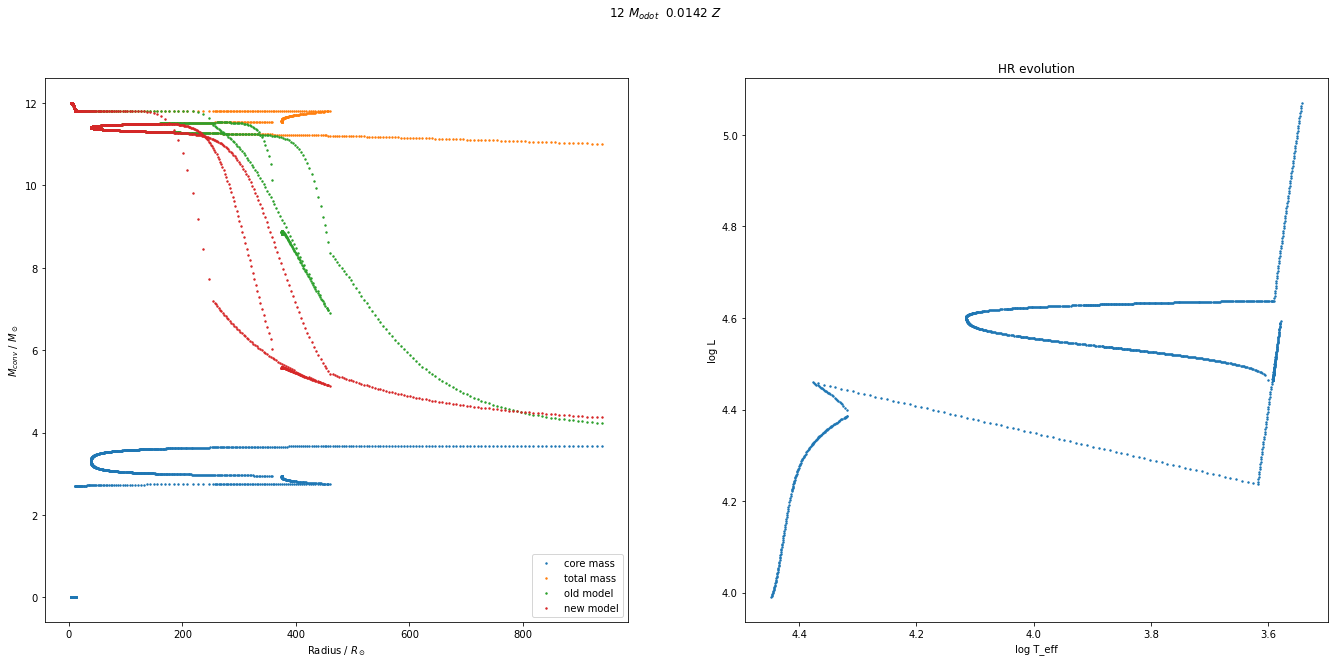

7
Z_compas = 0.0142, M_i_compass = 16
3406.674107247032


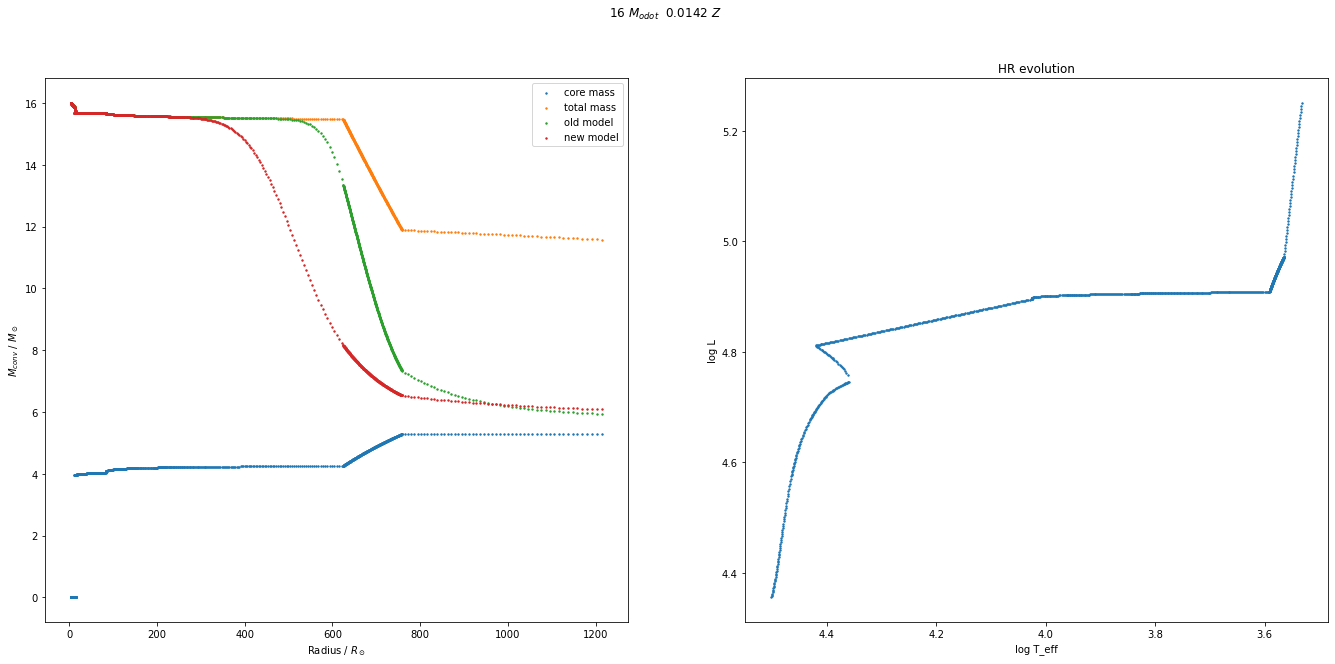

8
Z_compas = 0.0142, M_i_compass = 20
3443.122845441816


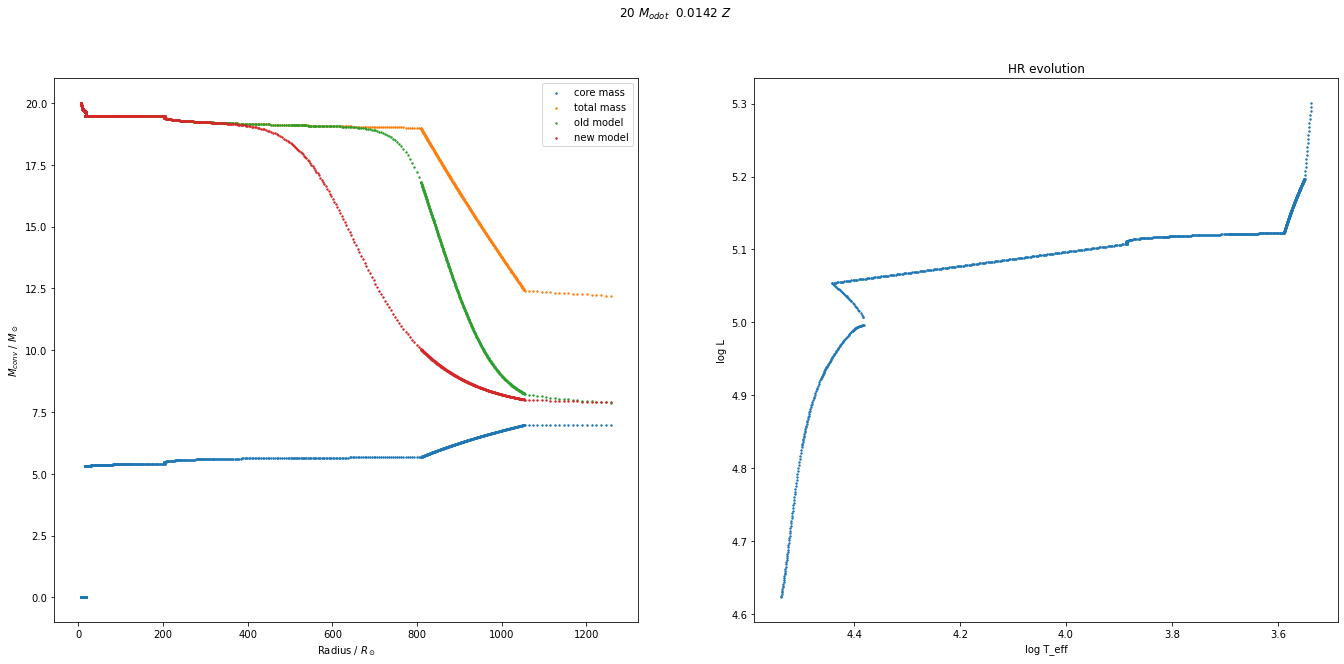

9
Z_compas = 0.0142, M_i_compass = 24
3366.3697031720044


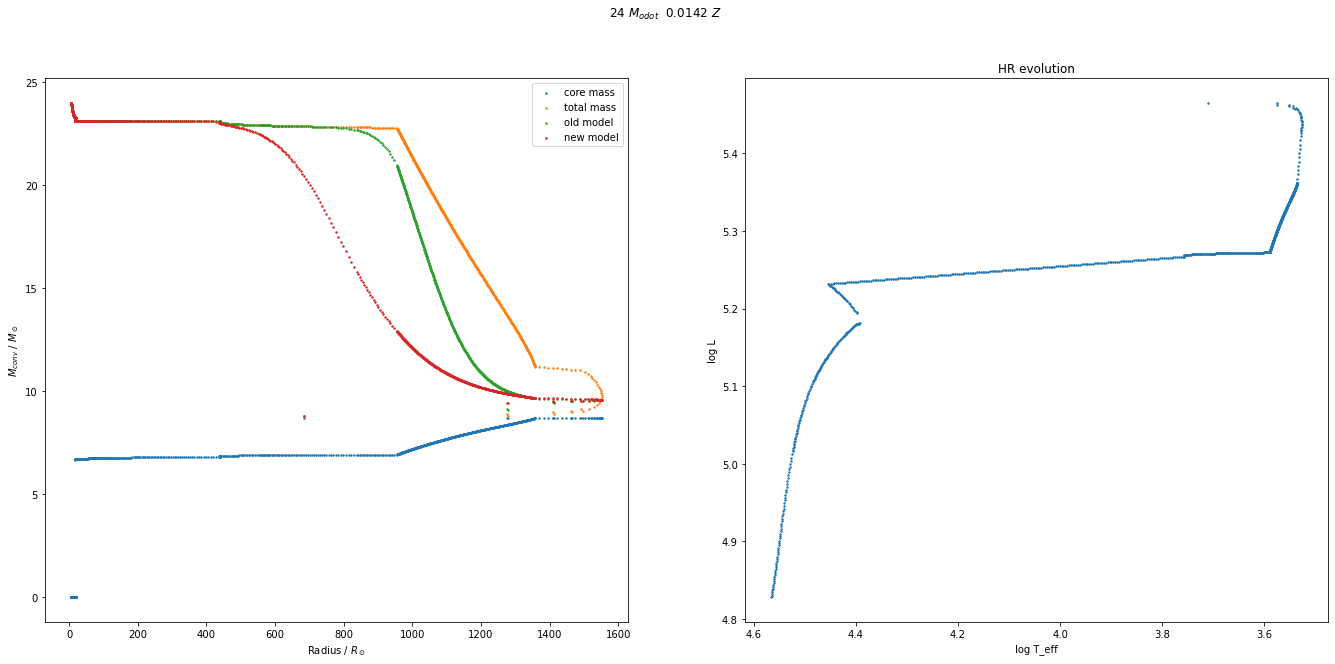

10
Z_compas = 0.00142, M_i_compass = 8
3101.4920829914654


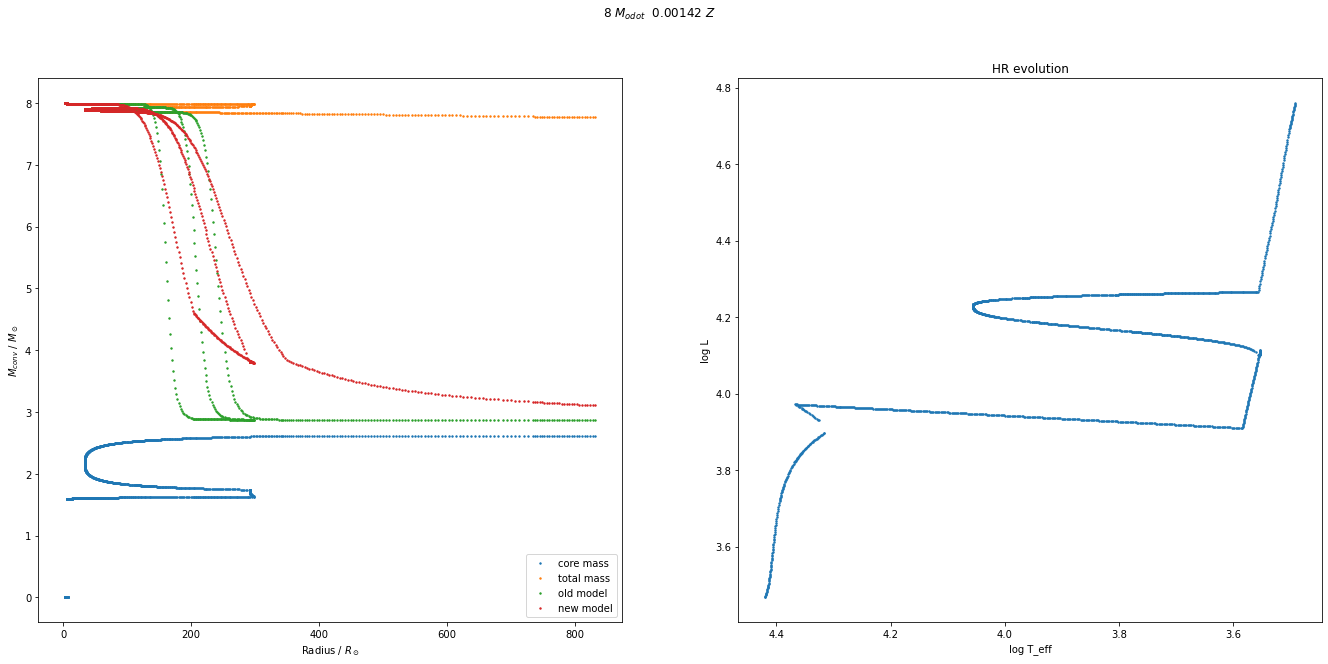

11
Z_compas = 0.00142, M_i_compass = 12
2895.643877864578


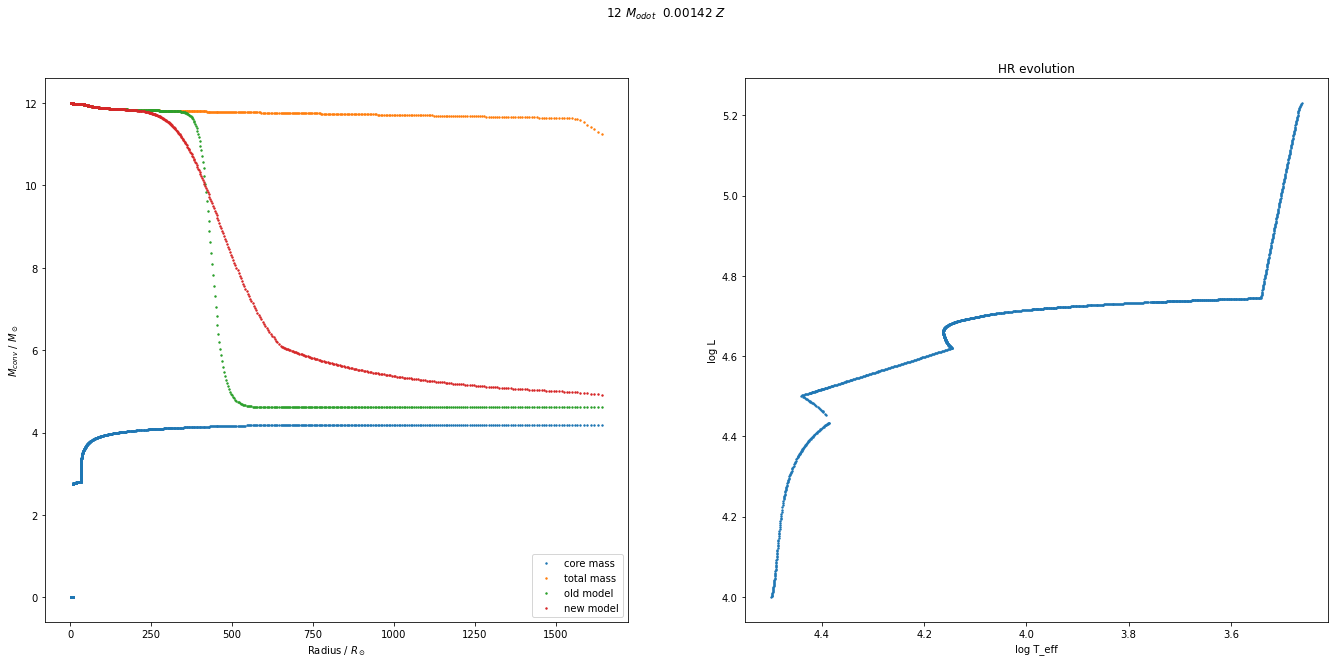

12
Z_compas = 0.00142, M_i_compass = 16
3040.374515989199


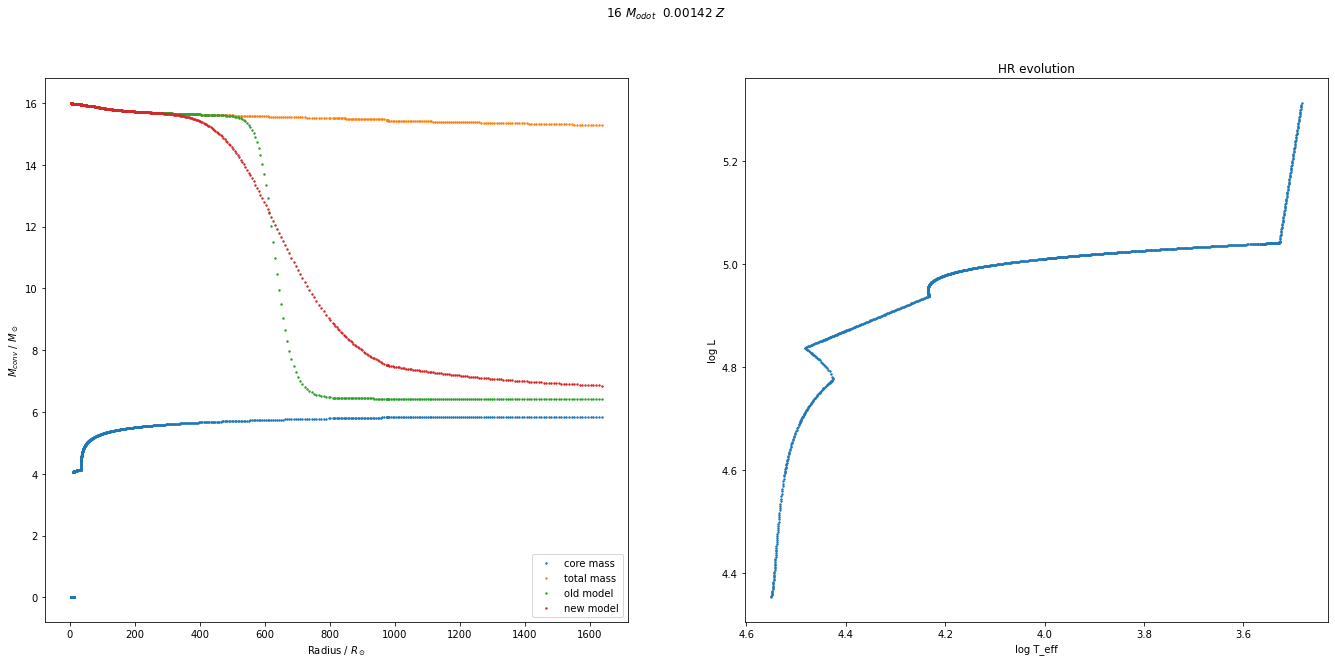

13
Z_compas = 0.00142, M_i_compass = 20
3144.904504001731


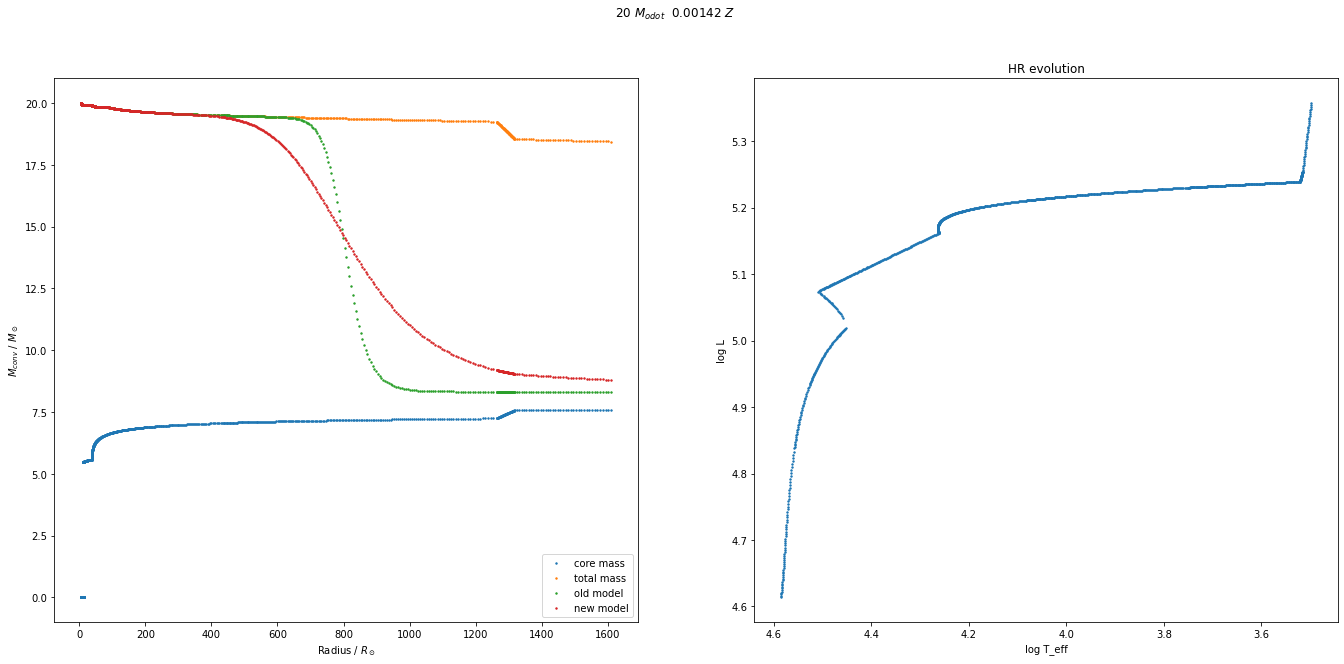

14
Z_compas = 0.00142, M_i_compass = 24
3056.5581188526803


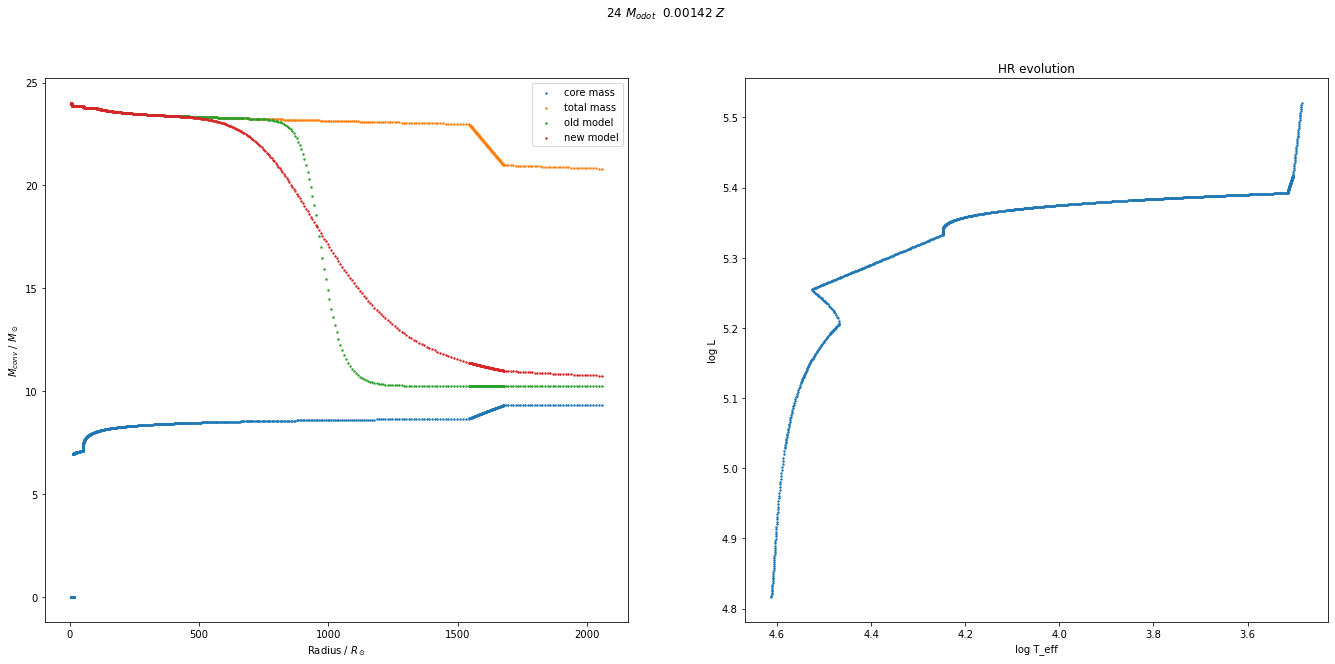

15
Z_compas = 0.000142, M_i_compass = 8
4453.814554823725


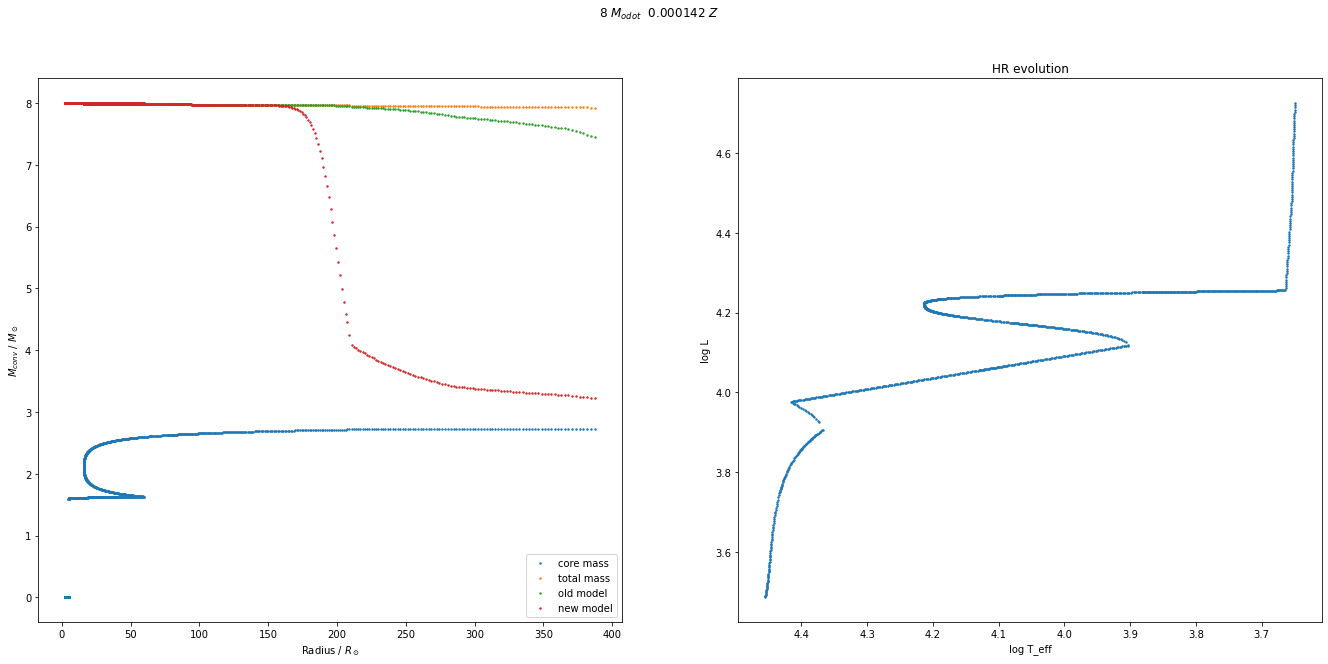

16
Z_compas = 0.000142, M_i_compass = 12
4421.354987360216


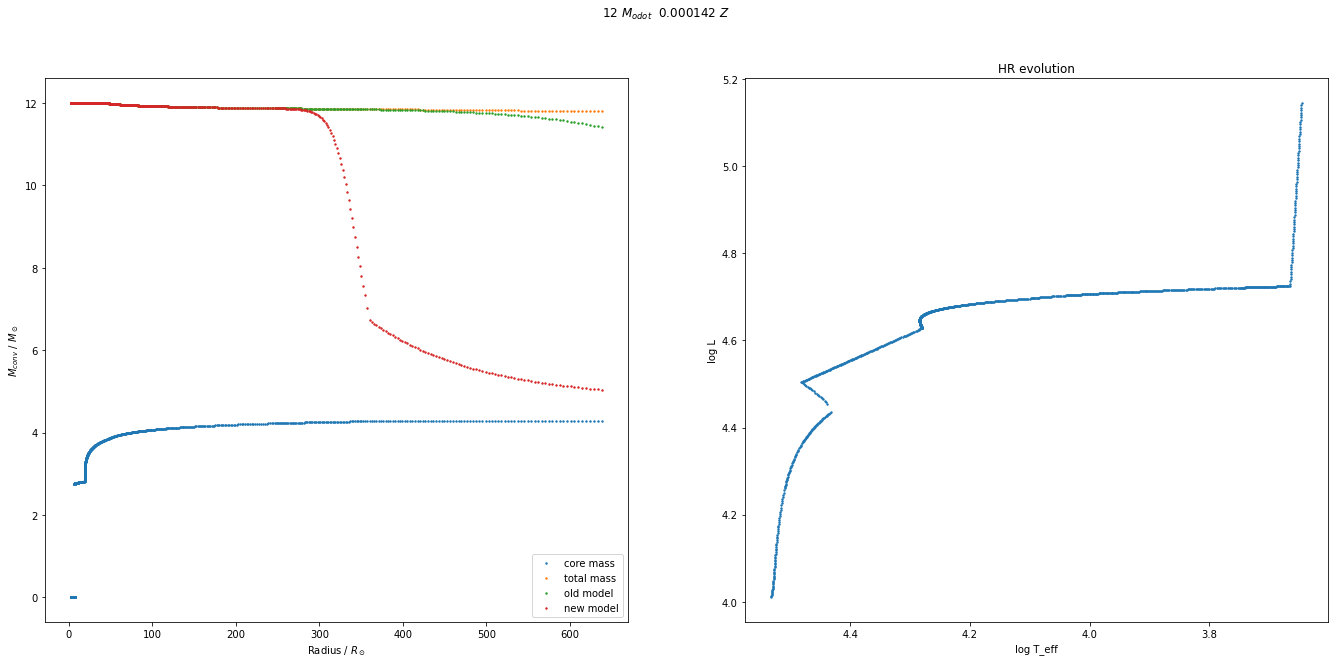

17
Z_compas = 0.000142, M_i_compass = 16
4514.56009381474


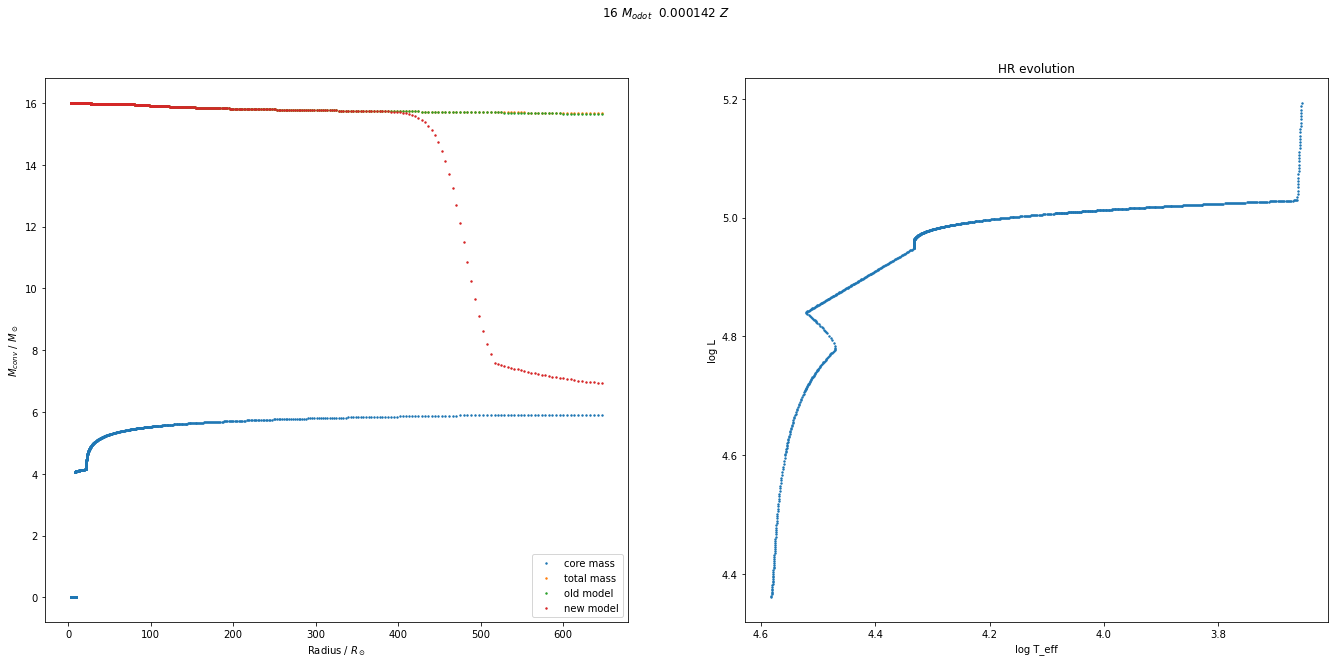

18
Z_compas = 0.000142, M_i_compass = 20
4525.769859096662


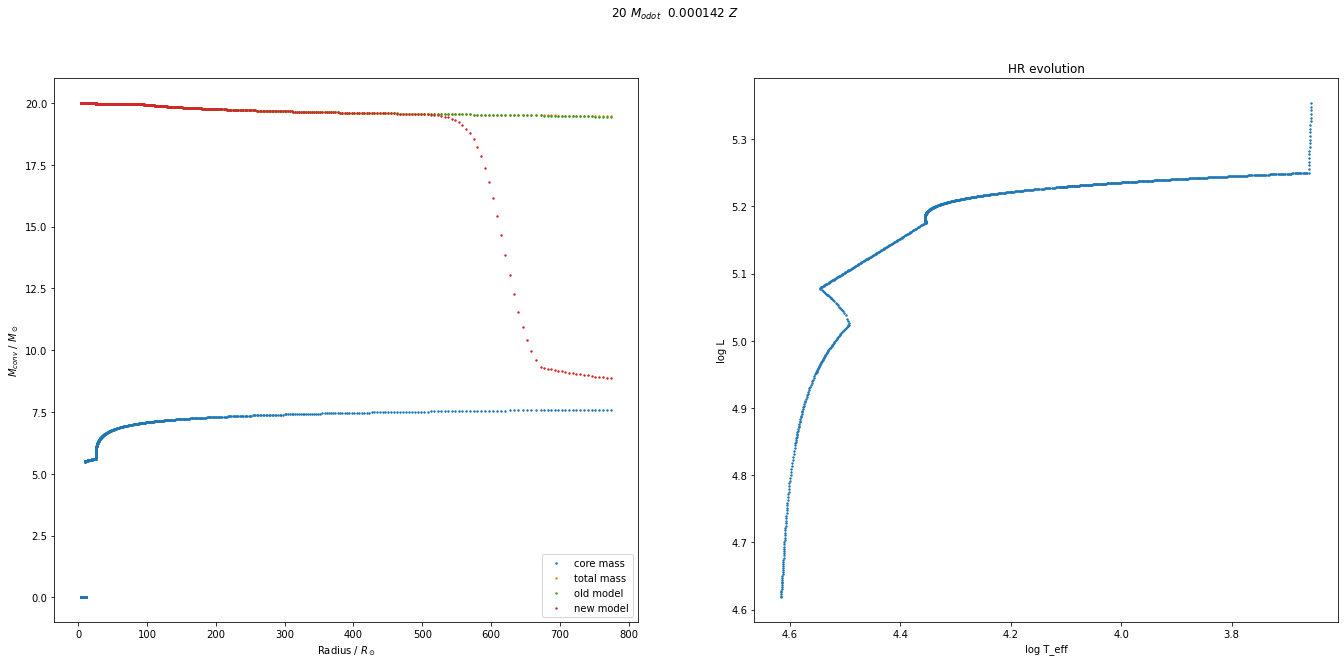

19
Z_compas = 0.000142, M_i_compass = 24
4512.533838577767


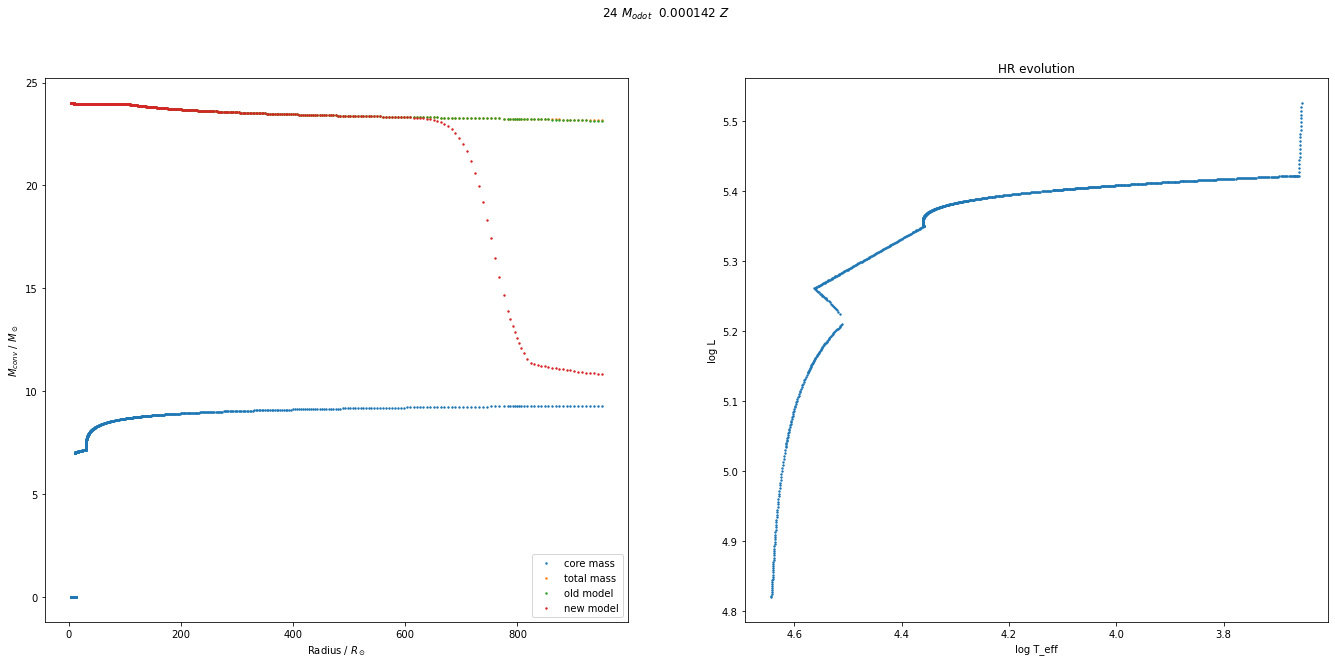

In [4]:
index = np.arange(20)

for i in index: #index[24:]: 
    
    print(i)
    pathToOutput = '/home/lewis/Documents/Honours_Research/COMPAS-dev/utils/preProcessing/COMPAS_Output/TMP/'
    pathToh5 = pathToOutput + 'SSE_Detailed_Output_' + str(i) + '.h5'
    Data = h5.File(pathToh5)

    
    L = Data['Luminosity'][()]
    Teff = Data['Teff'][()]
    St = Data['Stellar_Type'][()]
    radius = Data['Radius'][()]
    M_HEcore = Data['Mass_He_Core'][()]
    Mass = Data['Mass'][()]
    
    #get values of interest
    z = Data['Metallicity@ZAMS'][()][0]
    M_i = round(Mass[0])
    print(f'Z_compas = {z}, M_i_compass = {M_i}')
    
    
    tmp = []
    for val in St:
        if val not in tmp:
            tmp.append(val)

    idx_start = min(np.where(St == 1)[0])
    idx_end = max(np.where(St == tmp[-2])[0]) 
    
        #Defining points
    idx_TAMS = max(np.where(St==1)[0])
    idx_HG = max(np.where(St==2)[0])
    log_L_TAMS = np.log10(L[idx_TAMS])
    M_core_max = M_HEcore[-2]
    
    #calculating M_conv
    T_min = min(Teff[idx_start:idx_end])
    print(T_min)
    M_conv_max = M_conv_max_func(Mass,M_core_max, gamma)
    T_norm = T_norm_func(log_L_TAMS,a2(z),b2(z),c2(z))
    M_conv = M_conv_func(Teff, T_norm, b1(z), M_conv_max)
    M_conv_n = M_conv_new(Teff, 5000, T_min, M_conv_max, 3.0)
    
    fig, ax = plt.subplots(1, 2,figsize=(23, 10))
    
    ax[0].scatter(radius[idx_start:idx_end], M_HEcore[idx_start:idx_end], label = 'core mass', s=2)
    ax[0].scatter(radius[idx_start:idx_end], Mass[idx_start:idx_end], label = 'total mass', s=2 )
    ax[0].scatter(radius[:idx_end],Mass[:idx_end] - M_conv[:idx_end], label = 'old model', s=2)
    ax[0].scatter(radius[:idx_end],Mass[:idx_end] - M_conv_n[:idx_end], label = 'new model', s=2)


    title  = str(M_i) + ' $M_{odot}$  ' + str(z) + " $Z$"
    fig.suptitle(title)
    ax[0].set_xlabel('Radius / $R_\odot$')
    ax[0].set_ylabel("$M_{conv}$ / $M_\odot$")
    ax[0].legend()

    
    ax[1].scatter(np.log10(Teff[idx_start:idx_end]), np.log10(L[idx_start:idx_end]), s = 2)
    ax[1].set_xlabel('log T_eff')
    ax[1].set_ylabel('log L')
    ax[1].invert_xaxis()
    ax[1].set_title('HR evolution')
    if (z == 0.00014) and (M_i == 20):
        plt.savefig('Compass.pdf')
    elif i==28:
        plt.savefig('Compass.pdf')
    plt.show()
    
    
# M_conv_new(T_eff, Tonset, Tmin, M_conv_max, param)

0


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


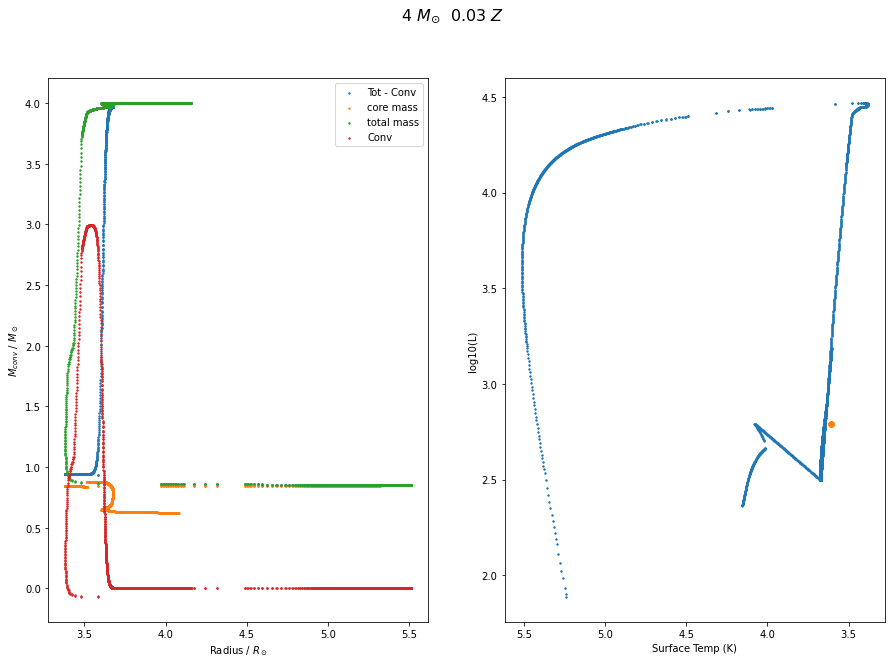

1


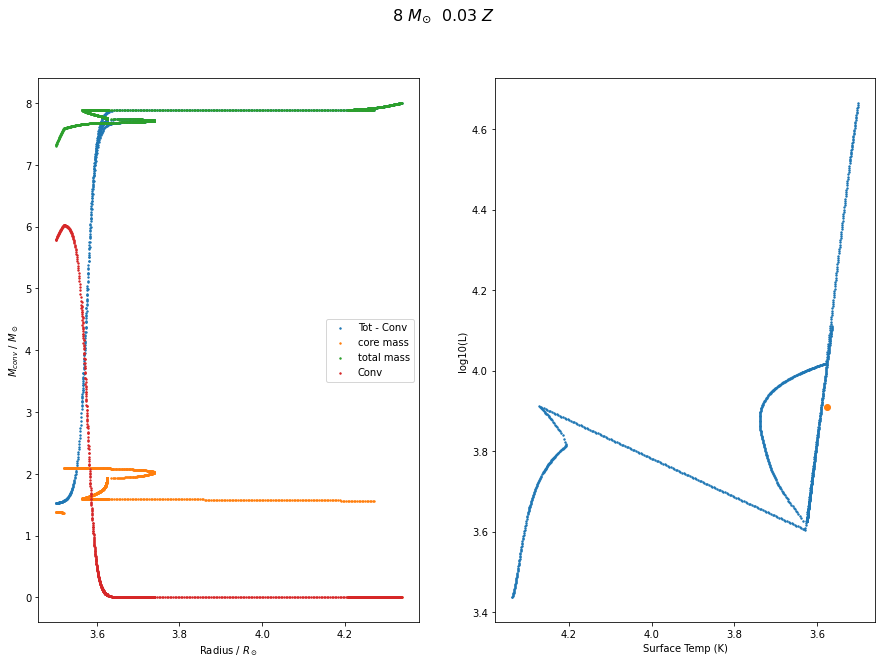

2


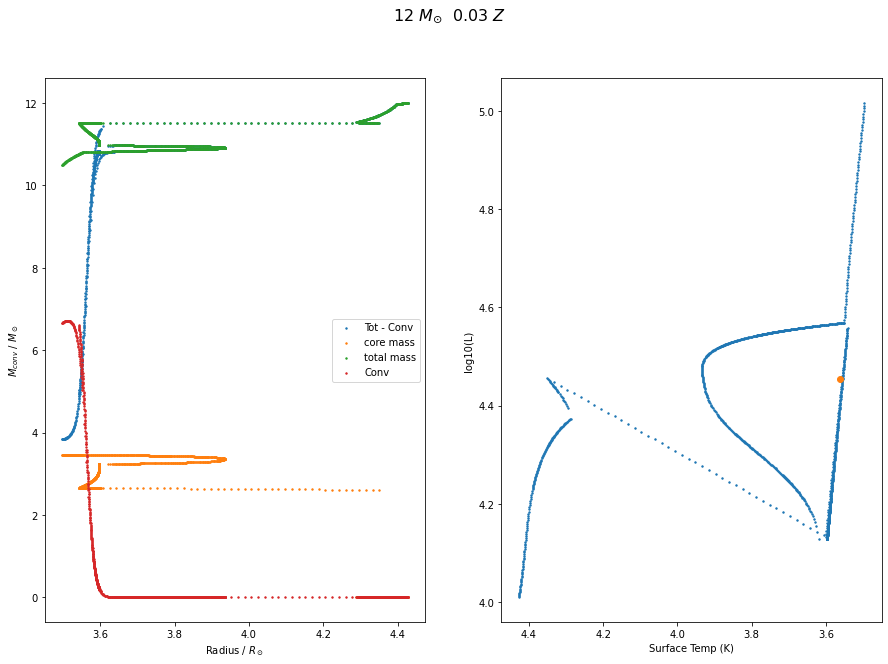

3


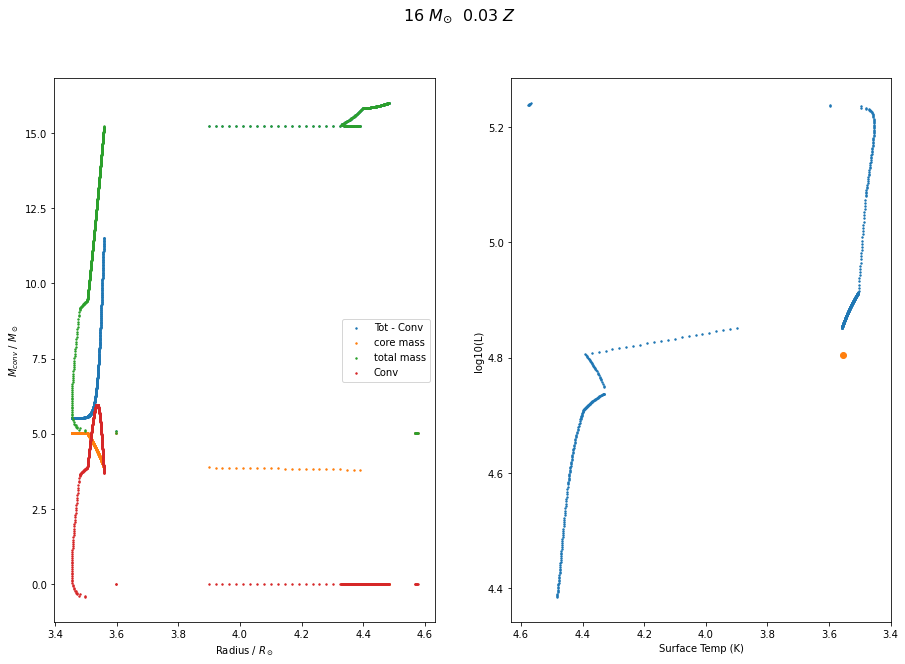

4


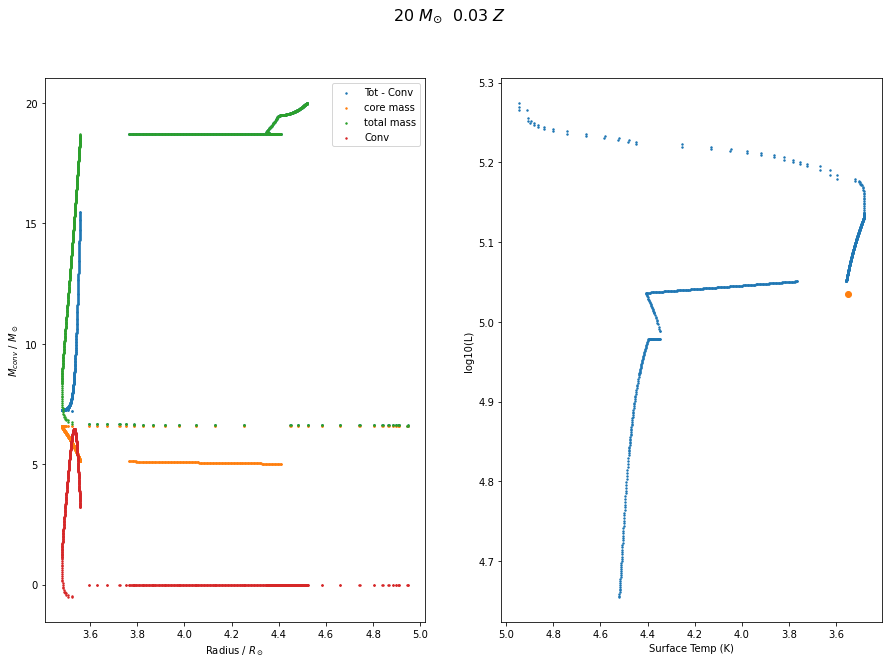

5


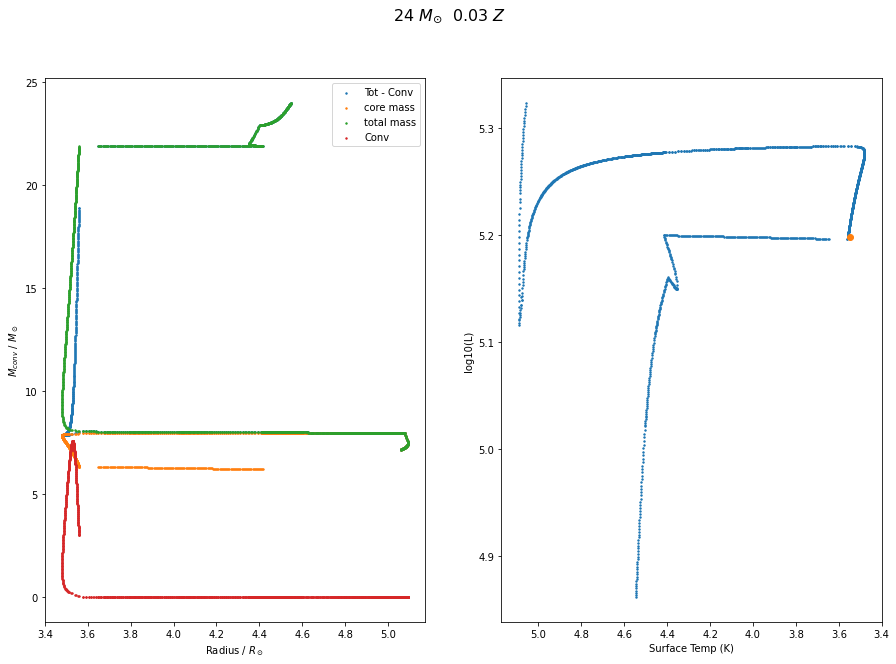

6


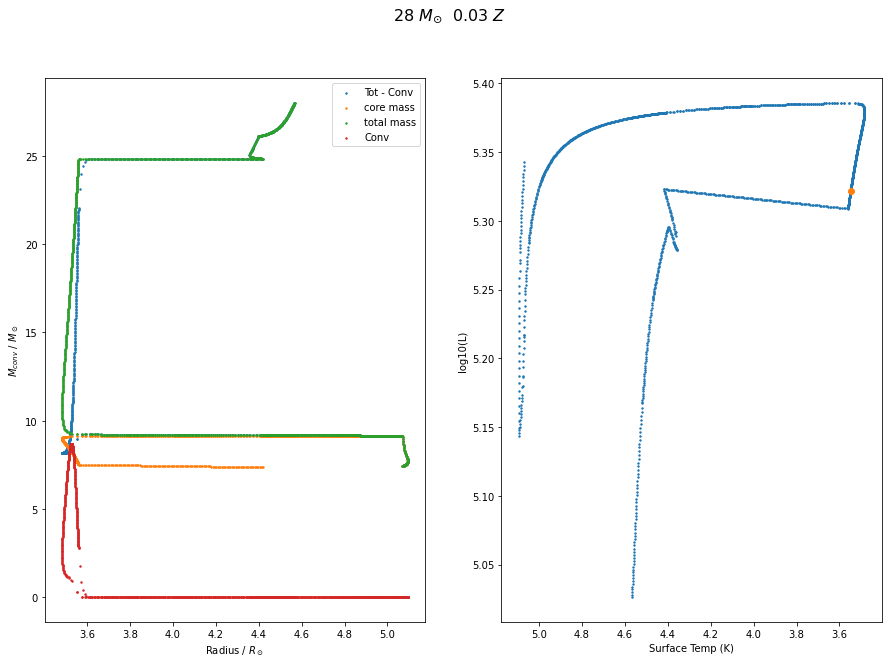

7


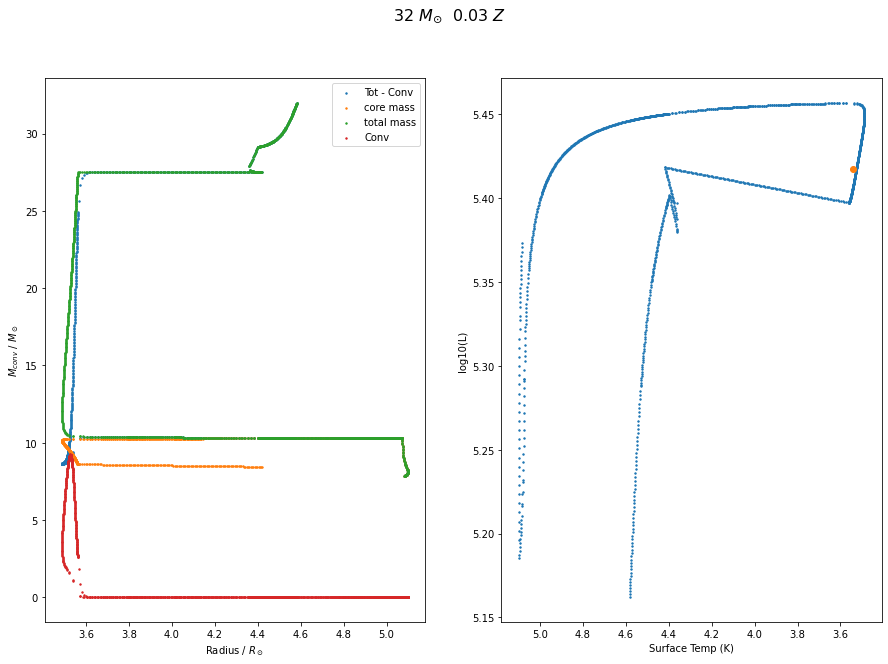

8


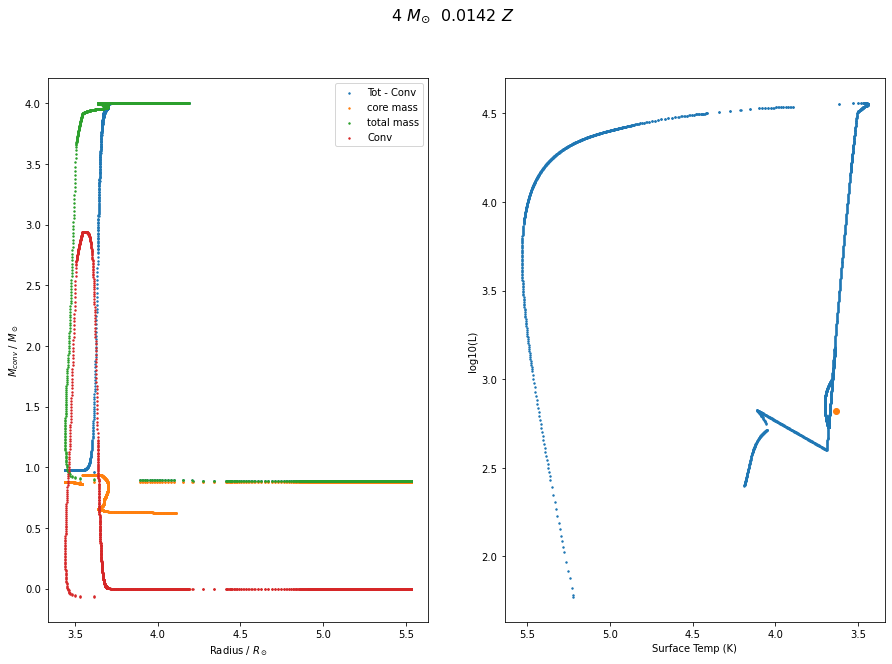

9


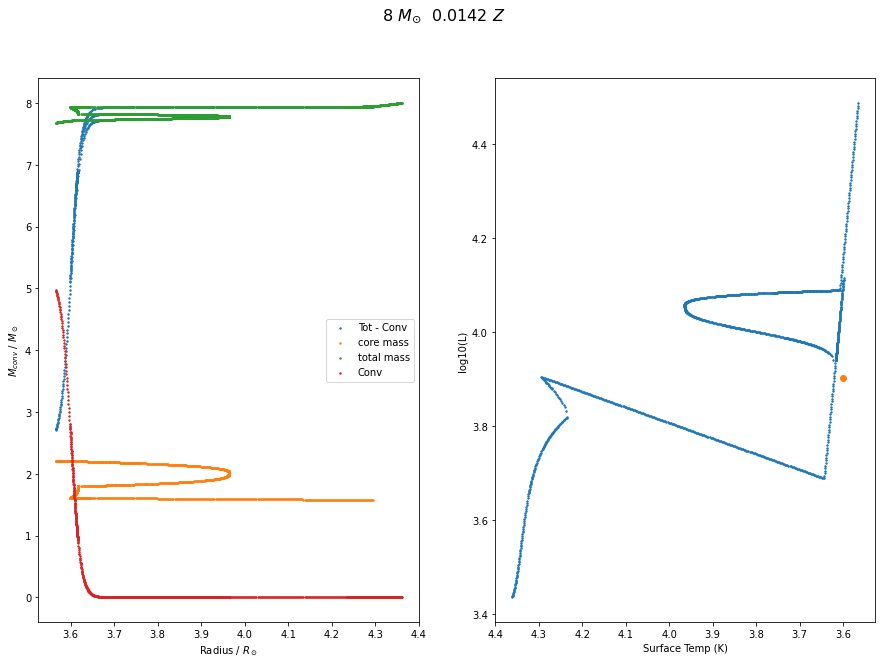

10


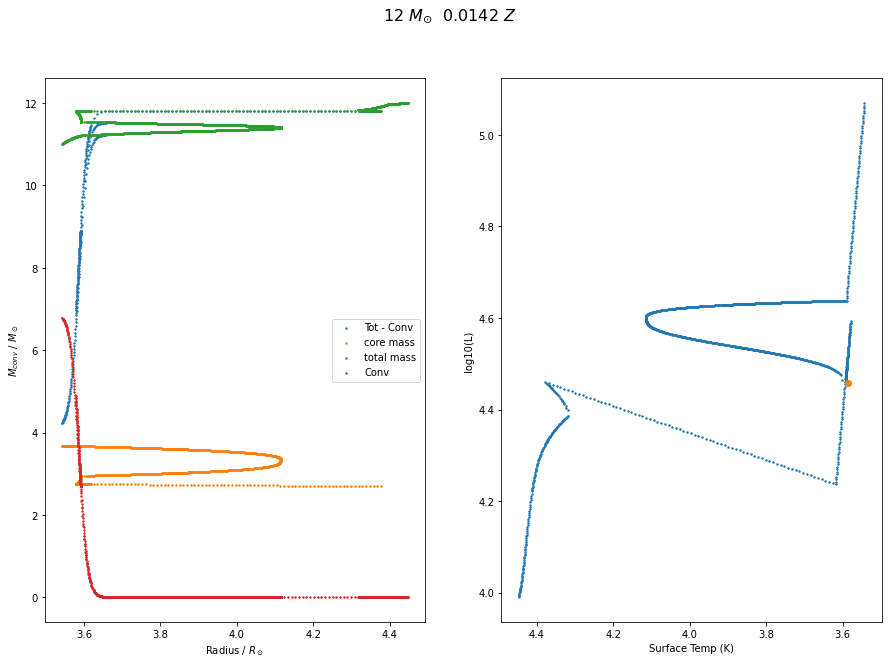

11


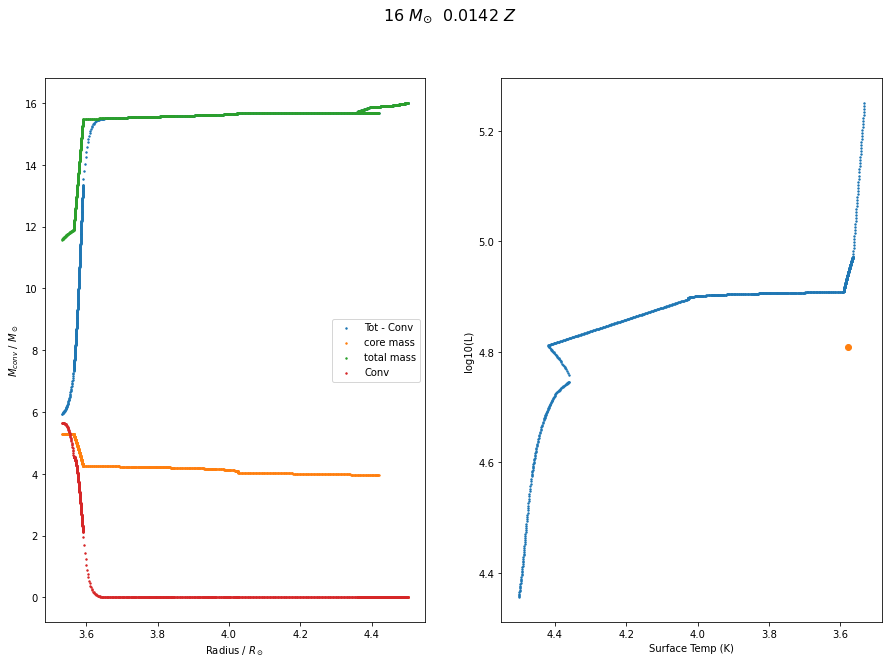

12


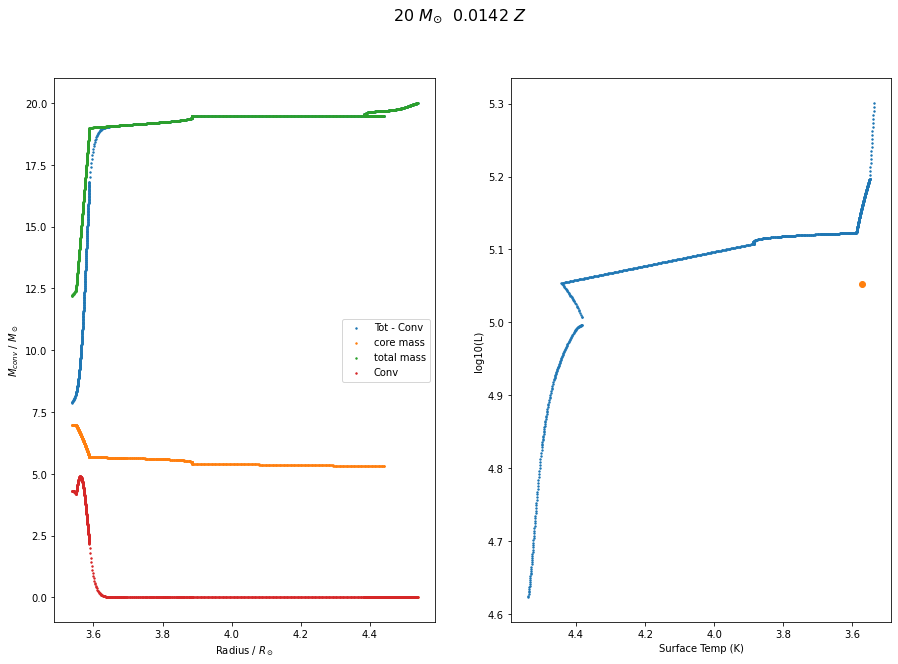

13


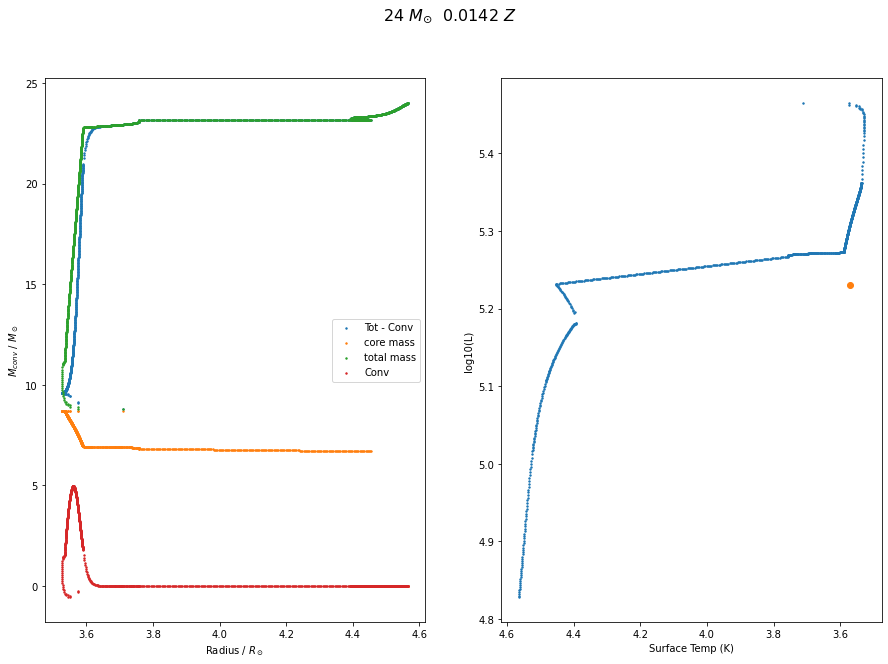

14


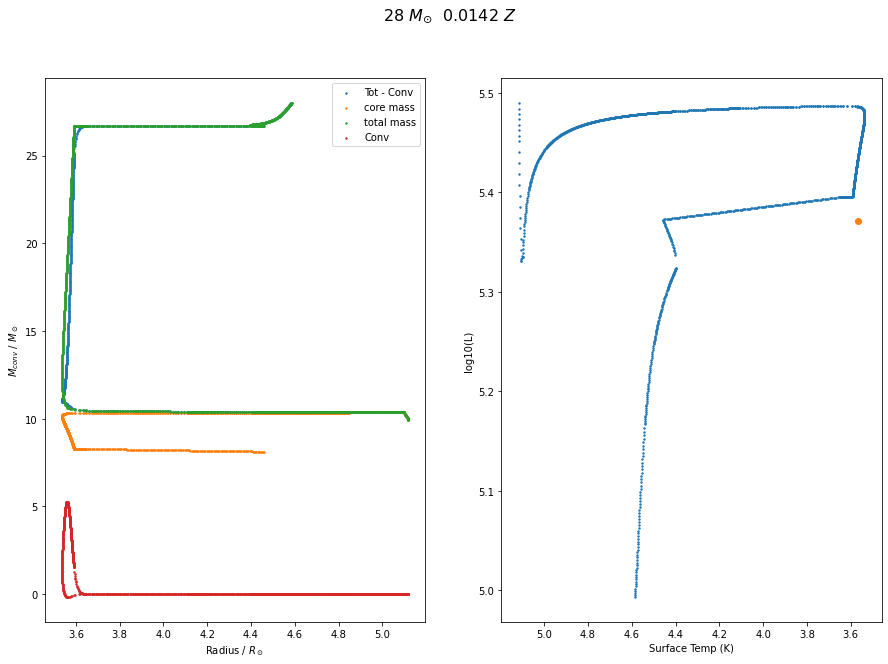

15


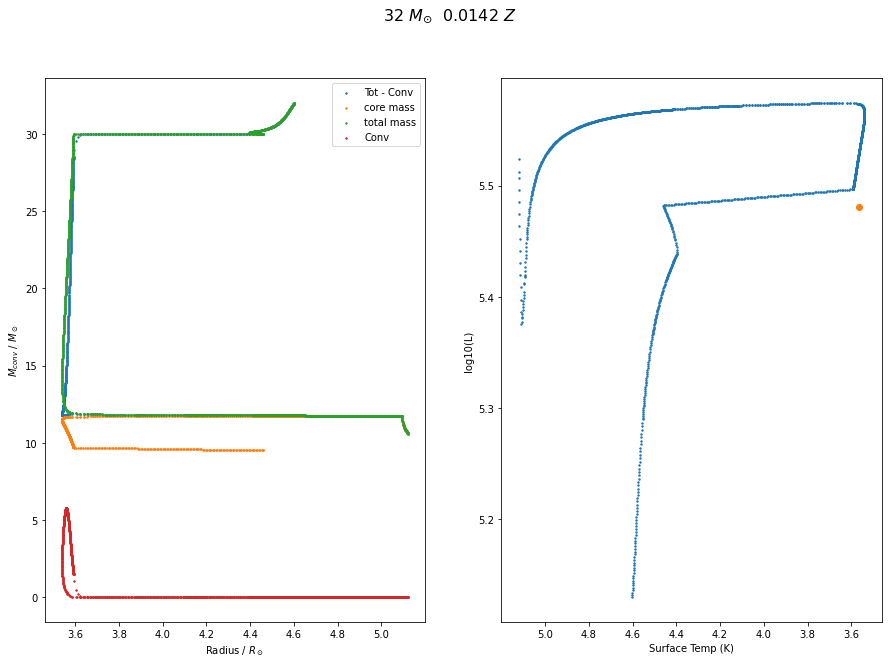

16


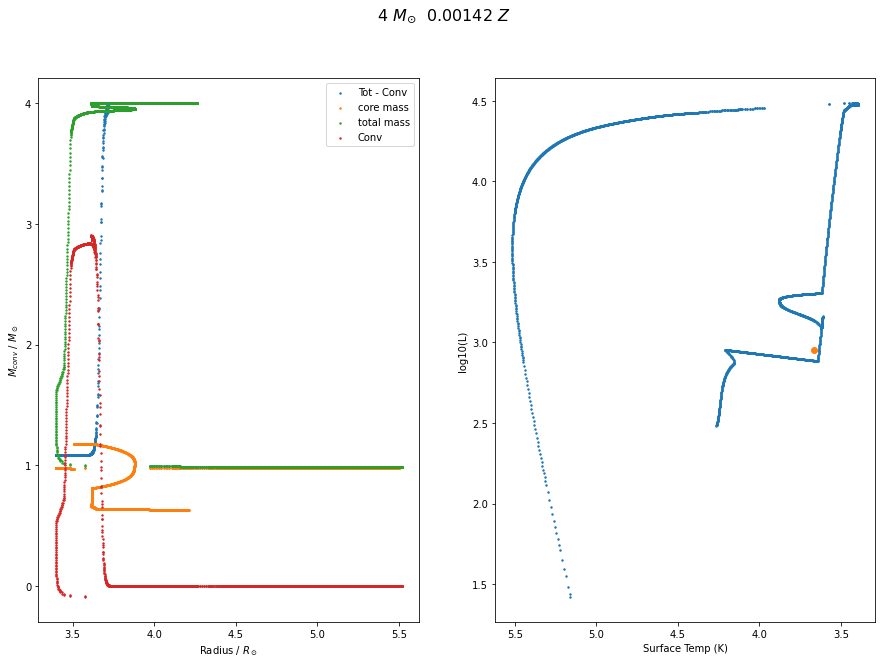

17


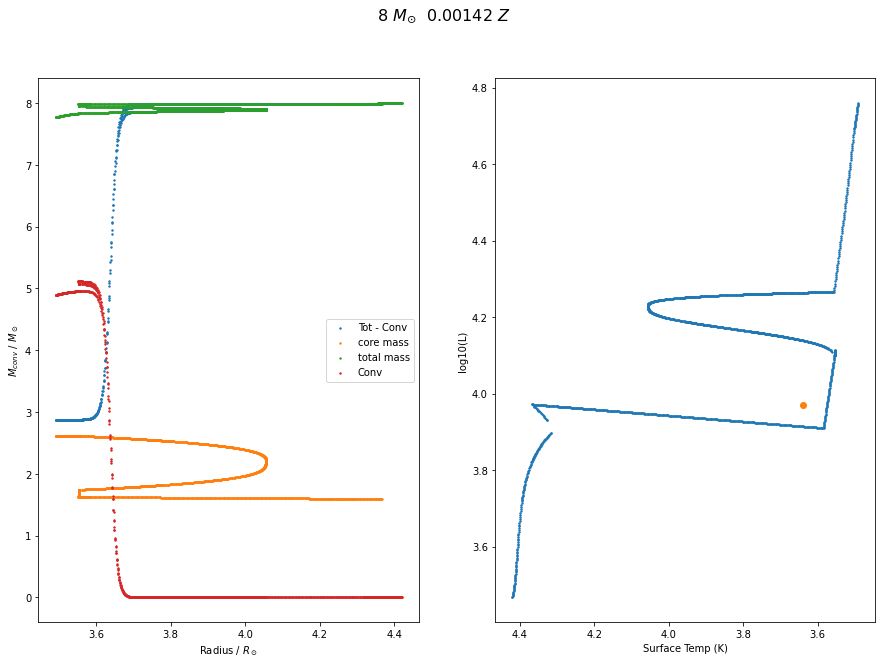

18


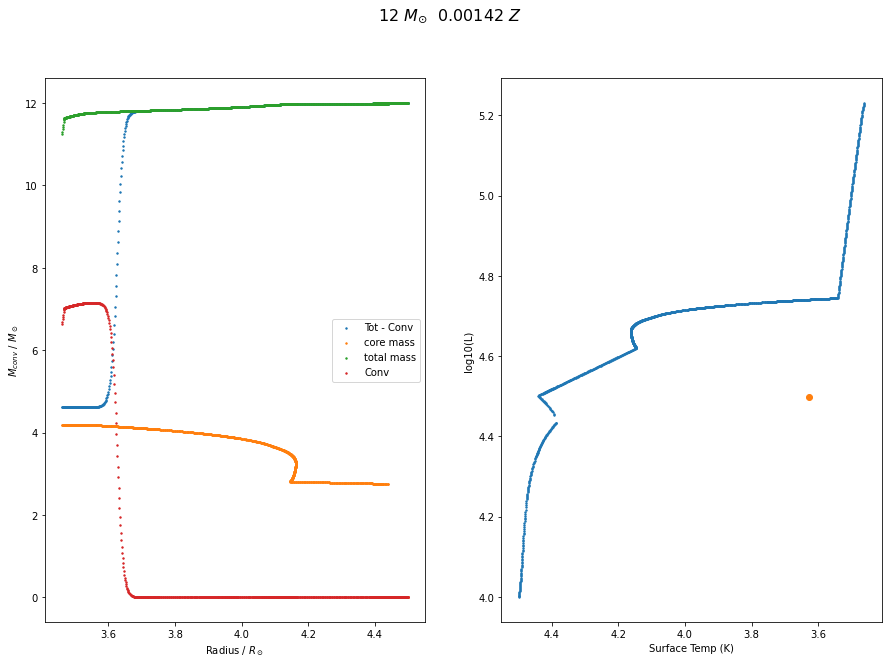

19


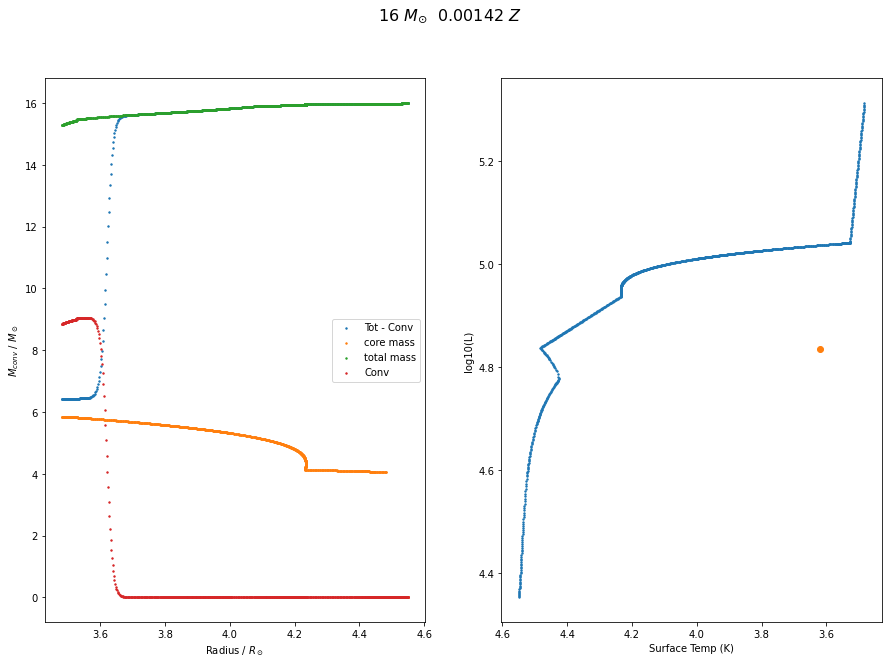

20


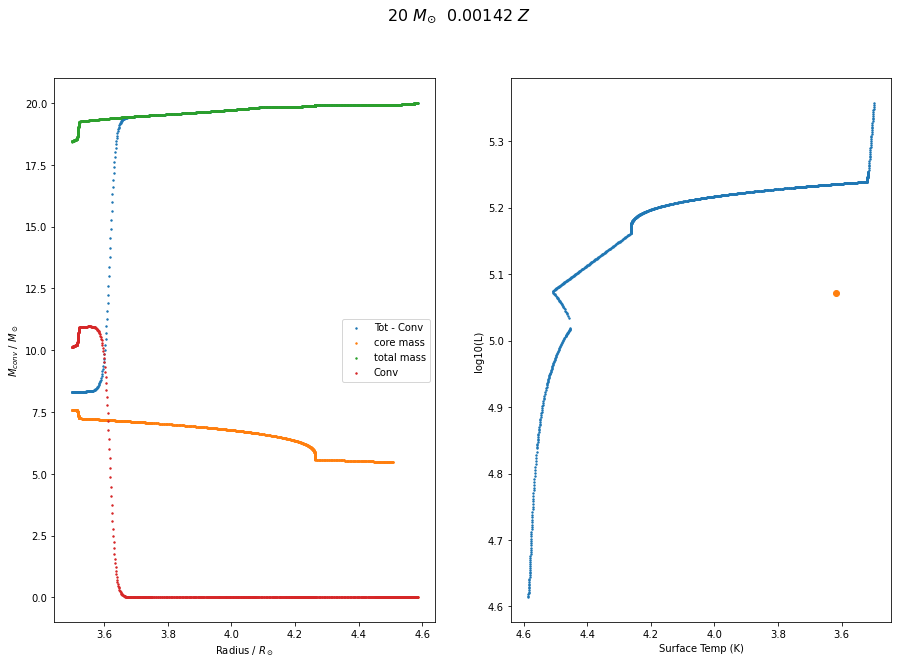

21


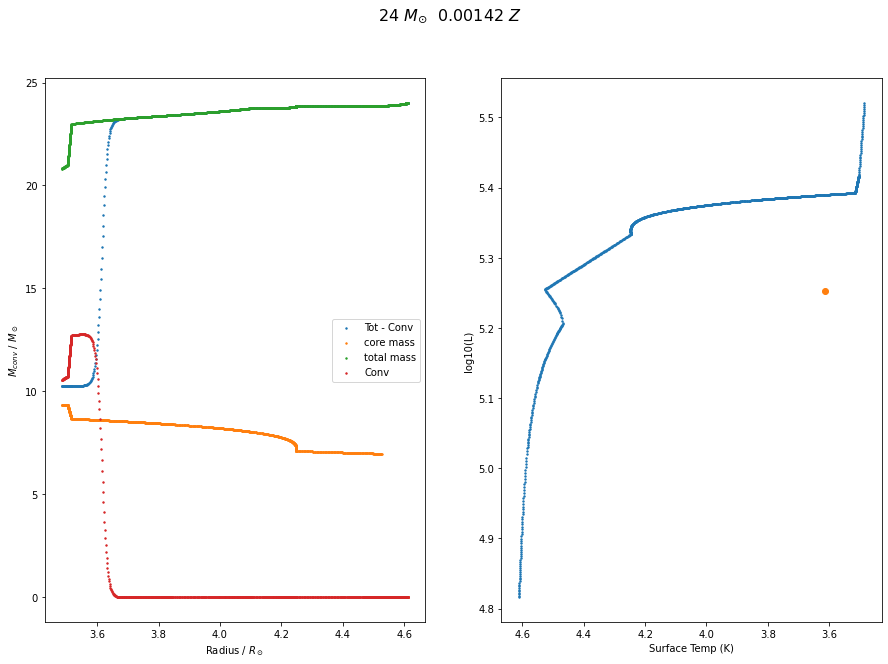

22


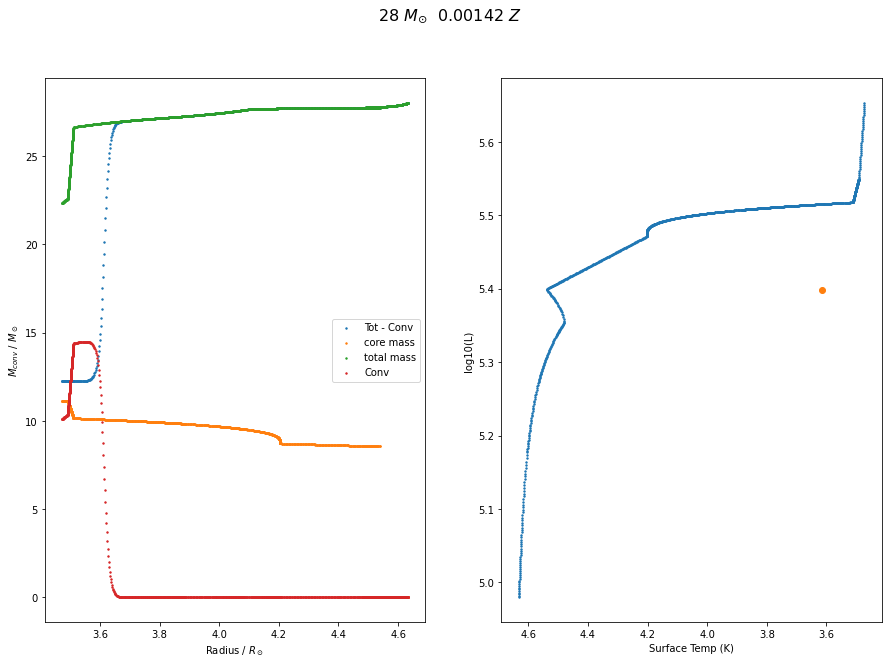

23


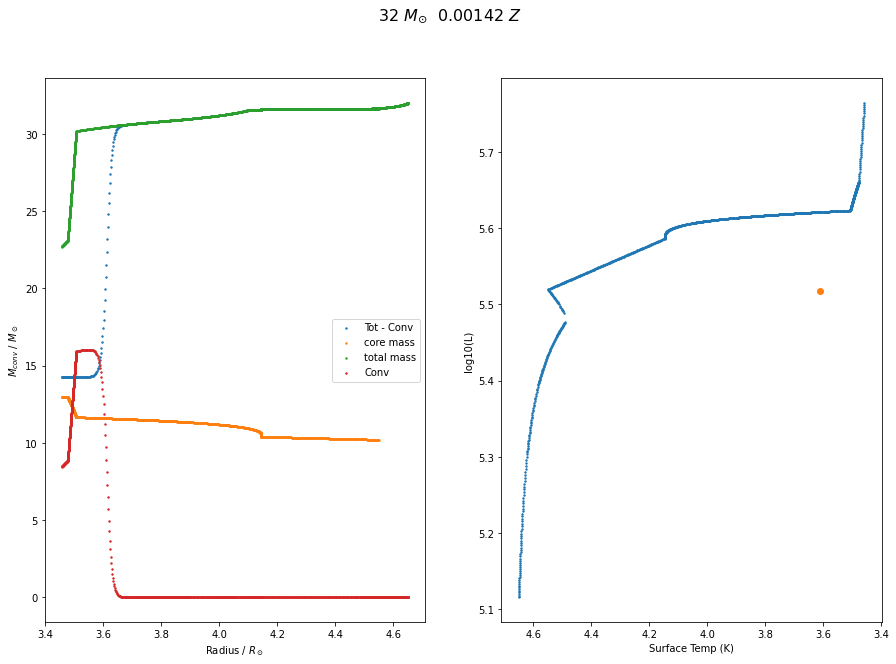

24


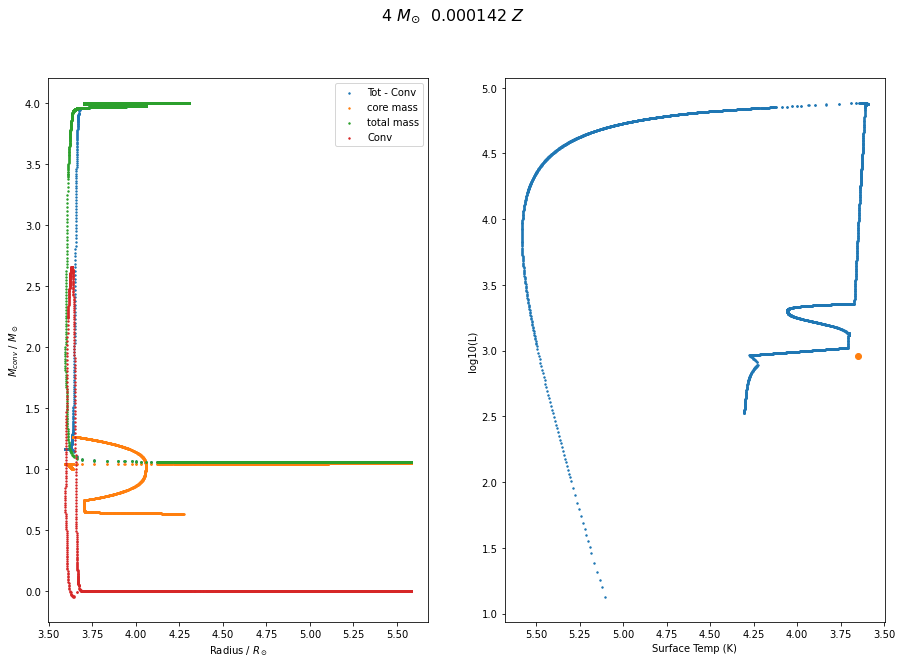

25


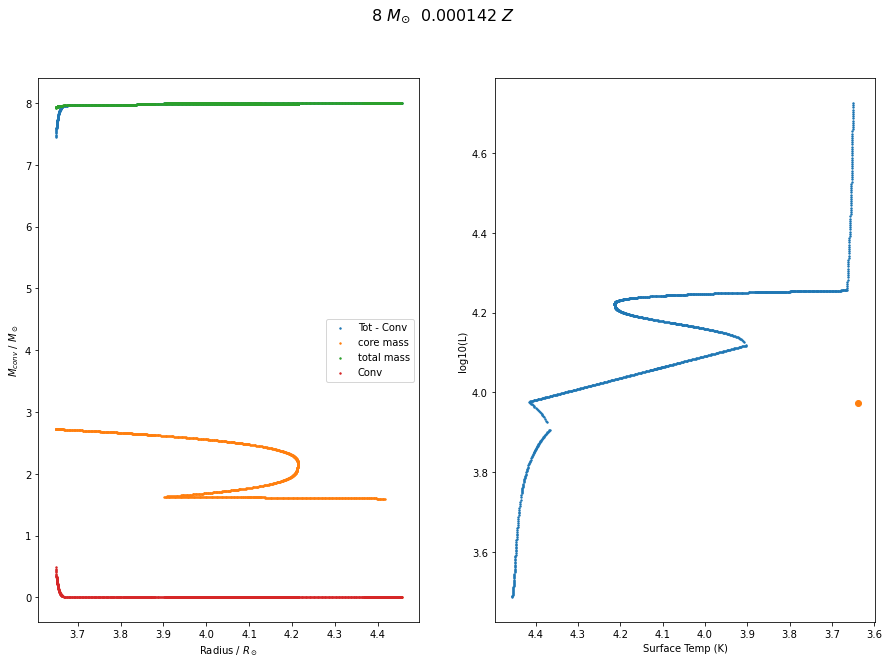

26


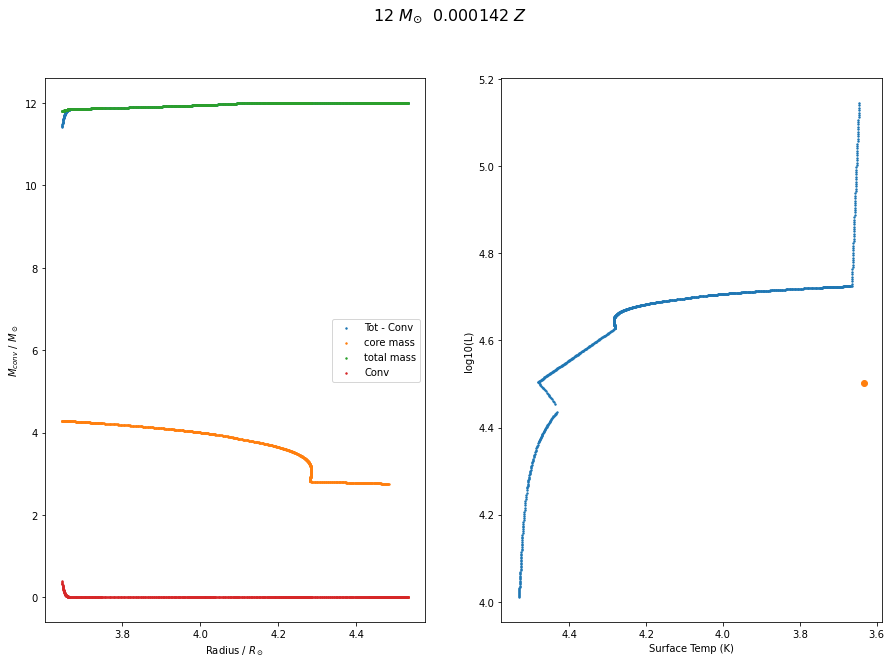

27


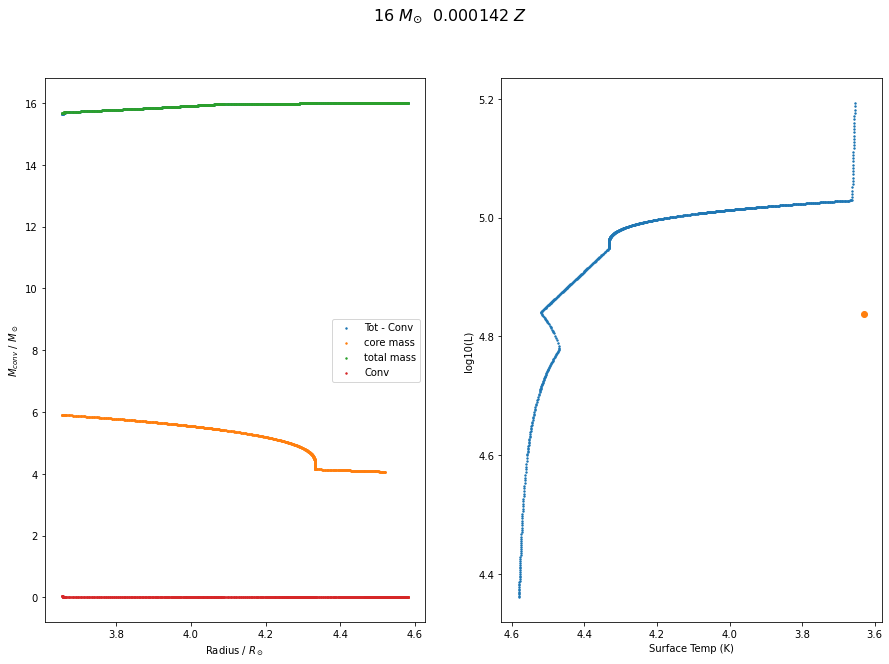

28


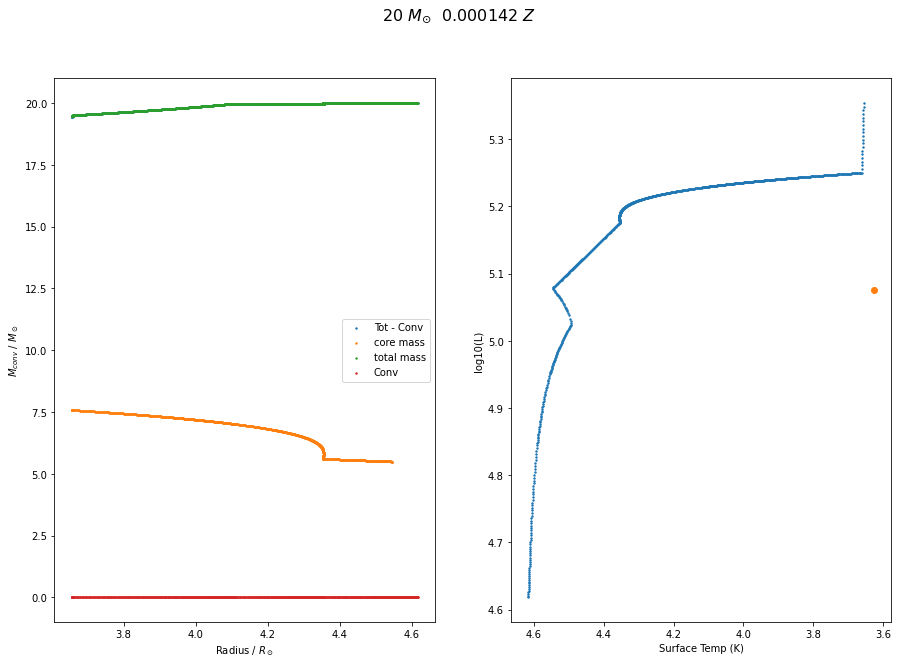

29


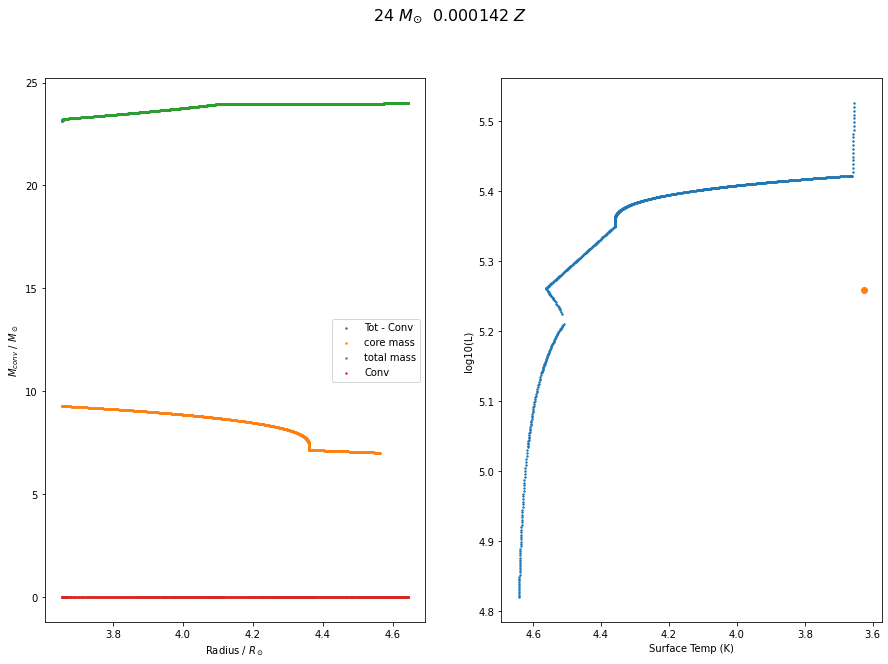

30


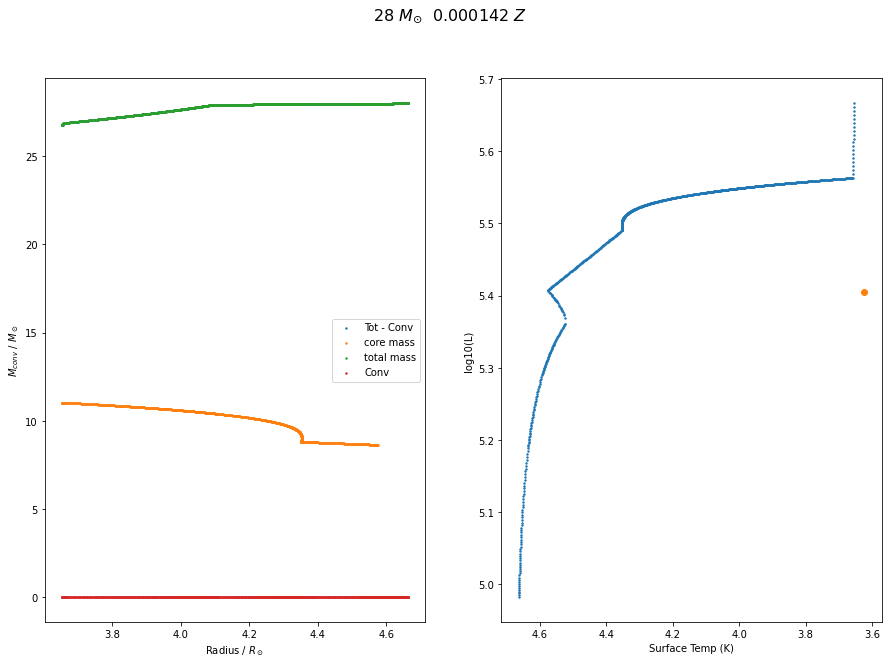

31


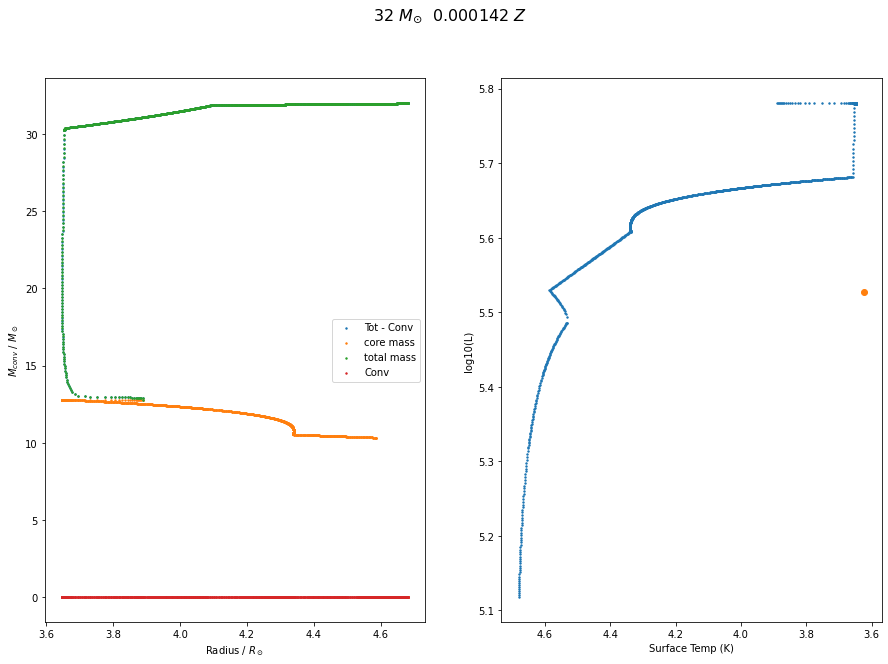

In [12]:
index = np.arange(32)

for i in index: 
    print(i)
    #read in data
    pathToOutput = '/home/lewis/Documents/Honours_Research/COMPAS-dev/utils/preProcessing/COMPAS_Output/Detailed_Output/'
    pathToh5 = pathToOutput + 'SSE_Detailed_Output_' + str(i) + '.h5'
    Data = h5.File(pathToh5)
    
    #get values of interest
    z = Data['Metallicity@ZAMS'][()][0]
    M_i = round(Data['Mass'][()][0])

    #parameters of interest
    St = Data['Stellar_Type'][()]
    L = Data['Luminosity'][()]
    Mass = Data['Mass'][()]
    Teff = Data['Teff'][()]
    radius = Data['Radius'][()]
    M_HEcore = Data['Mass_He_Core'][()]
    
    #Defining points
    idx_TAMS = max(np.where(St==1)[0])
    idx_HG = max(np.where(St==2)[0])

    log_L_TAMS = np.log10(L[idx_TAMS])
    M_core_max = M_HEcore[-2]
    
    #calculating M_conv
    M_conv_max = M_conv_max_func(Mass,M_core_max, gamma)
    T_norm = T_norm_func(log_L_TAMS,a2(z),b2(z),c2(z))
    M_conv = M_conv_func(Teff,T_norm,b1(z),M_conv_max)
    
    #I want to stop plotting before the remenant  
    tmp = []
    for val in St:
        if val not in tmp:
            tmp.append(val)

    idx_end = max(np.where(St == tmp[-2])[0])    


    fig, axs = plt.subplots(1, 2,figsize=(15, 10))
    
    axs[0].scatter(np.log10(Teff[:idx_end]),Mass[:idx_end] - M_conv[:idx_end], label = 'Tot - Conv', s=2)
    axs[0].scatter(np.log10(Teff[:idx_end]), M_HEcore[:idx_end], label = 'core mass', s=2)
    axs[0].scatter(np.log10(Teff[:idx_end]), Mass[:idx_end], label = 'total mass', s=2 )
    axs[0].scatter(np.log10(Teff[:idx_end]),M_conv[:idx_end], label = 'Conv', s=2)
    axs[0].set_xlabel('Radius / $R_\odot$')
    axs[0].set_ylabel("$M_{conv}$ / $M_\odot$")
    axs[0].legend()
    
    axs[1].scatter(np.log10(Teff[:idx_end]), np.log10(L[:idx_end]),s = 2 )
    axs[1].set_xlabel('Surface Temp (K)')
    axs[1].scatter(np.log10(T_norm),log_L_TAMS)
    axs[1].set_ylabel("log10(L)")
    axs[1].invert_xaxis()
    
    title  = str(M_i) + ' $M_{\odot}$  ' + str(z) + " $Z$"
    fig.suptitle(title, fontsize=16)
    plt.show()

0


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


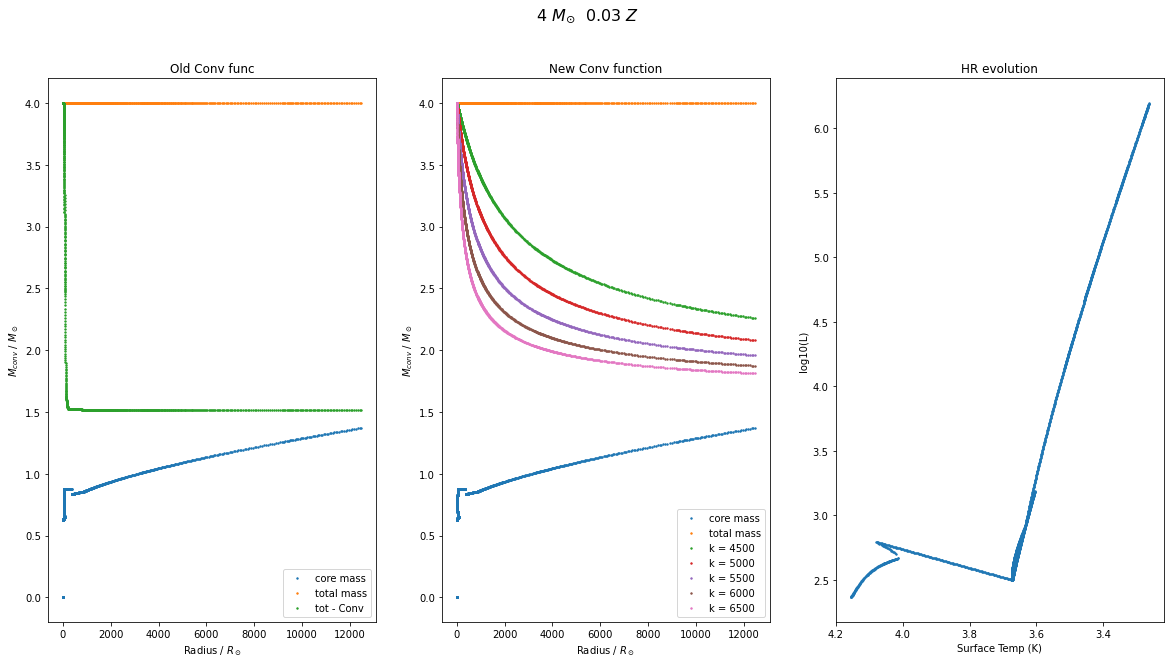

1


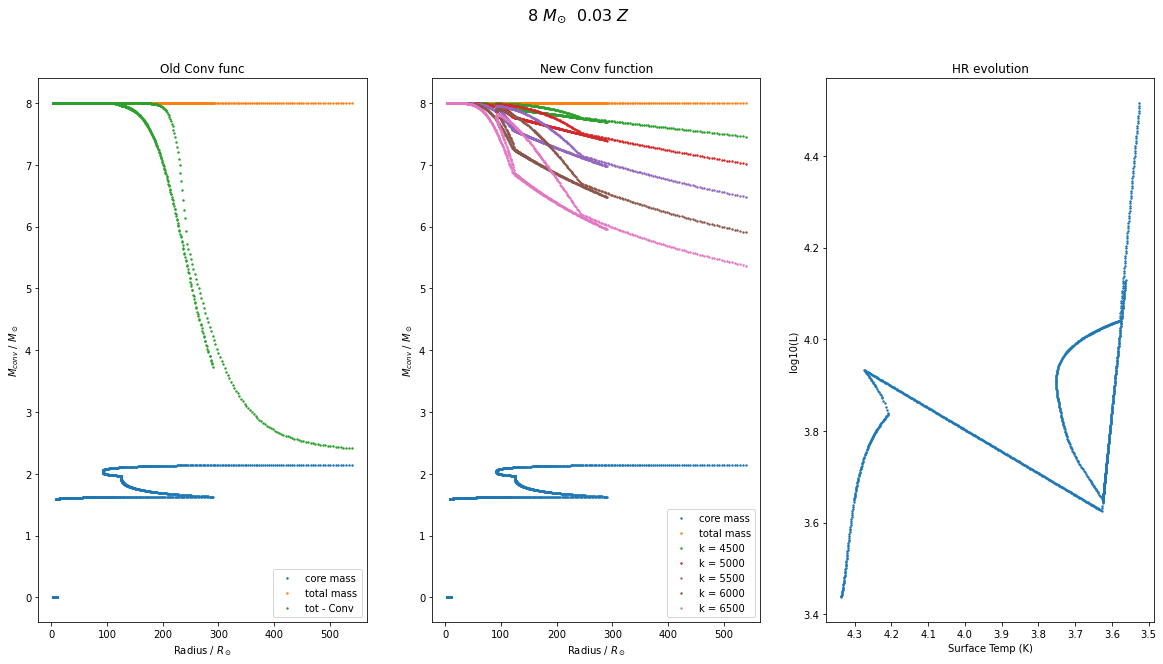

2


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


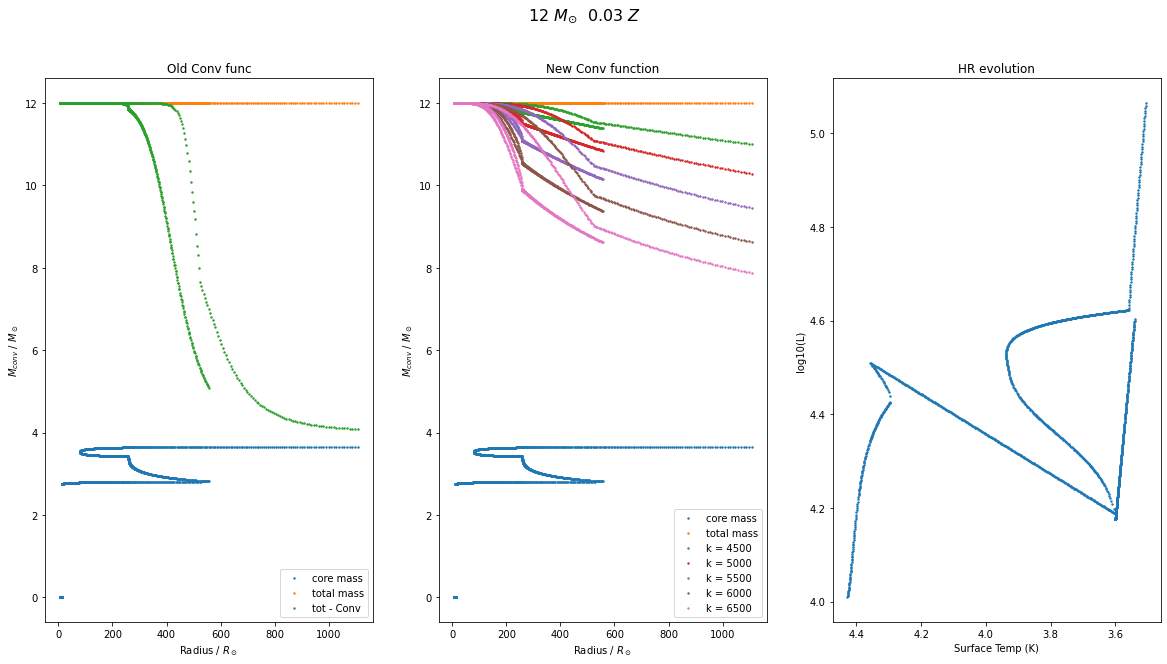

3


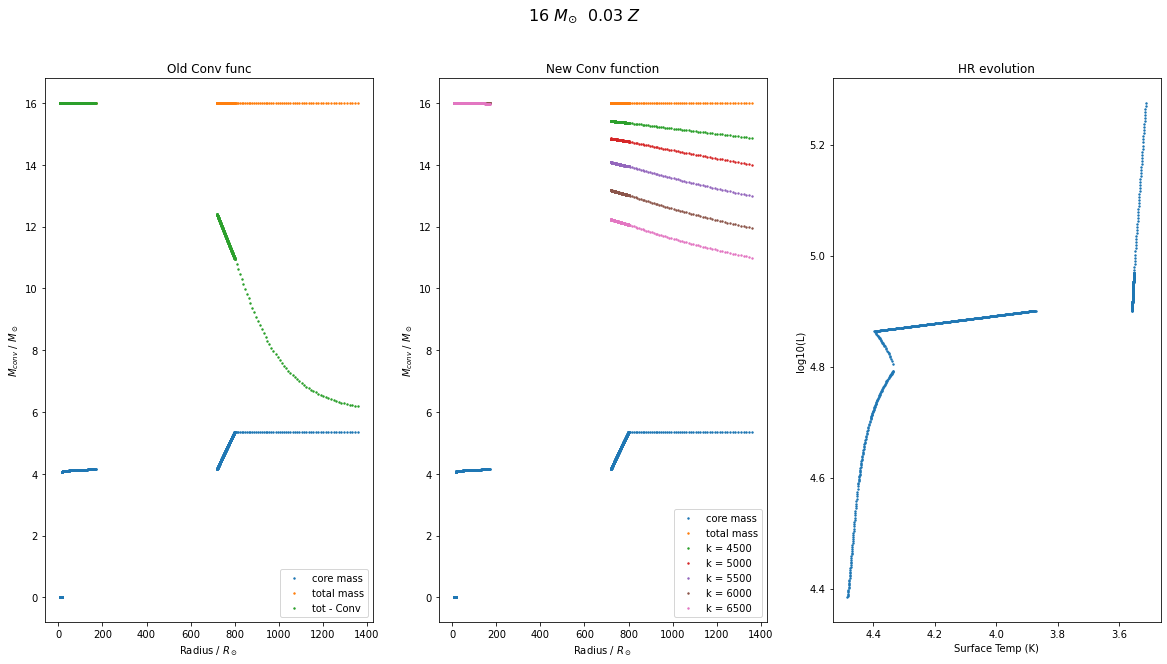

4


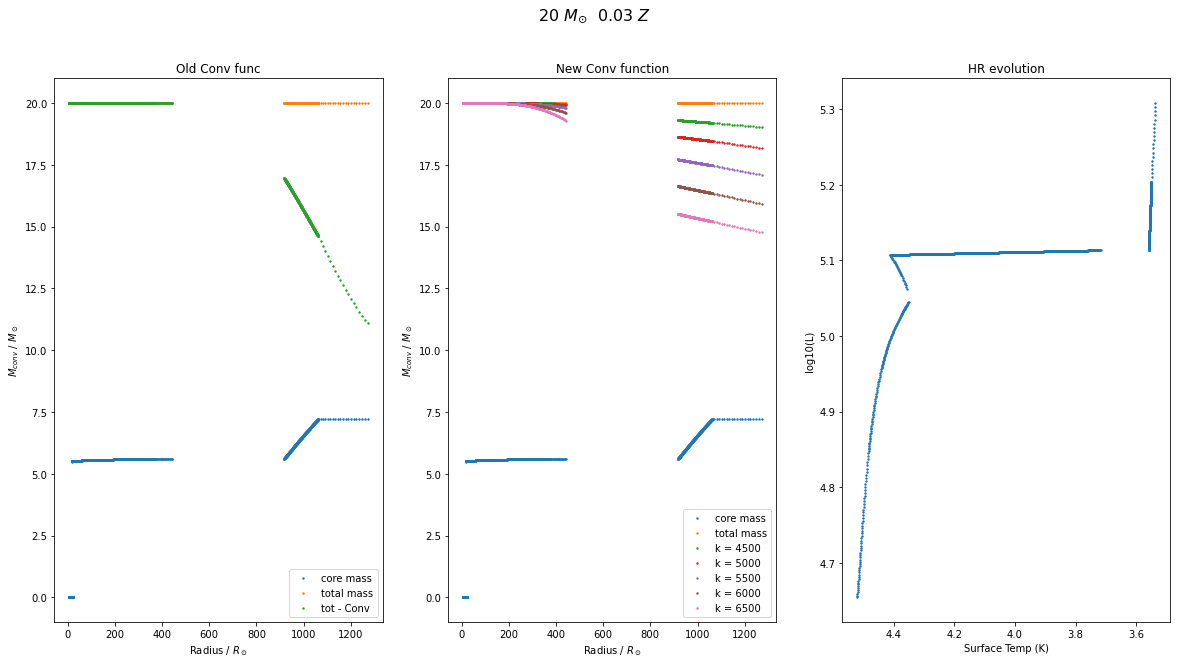

5


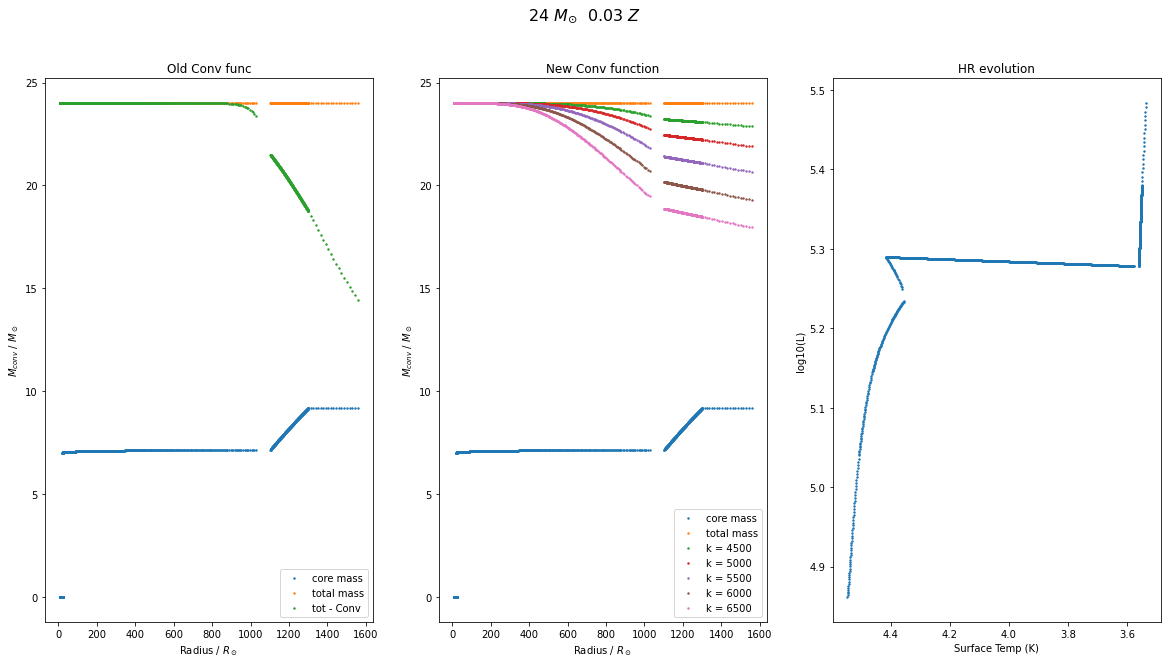

6


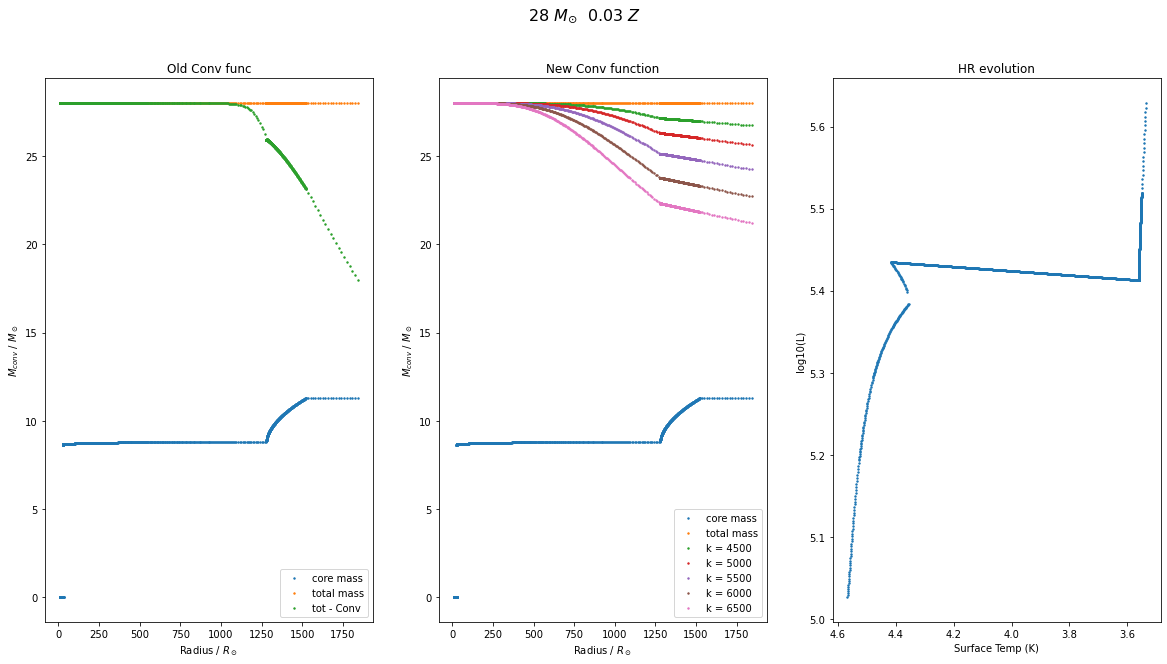

7


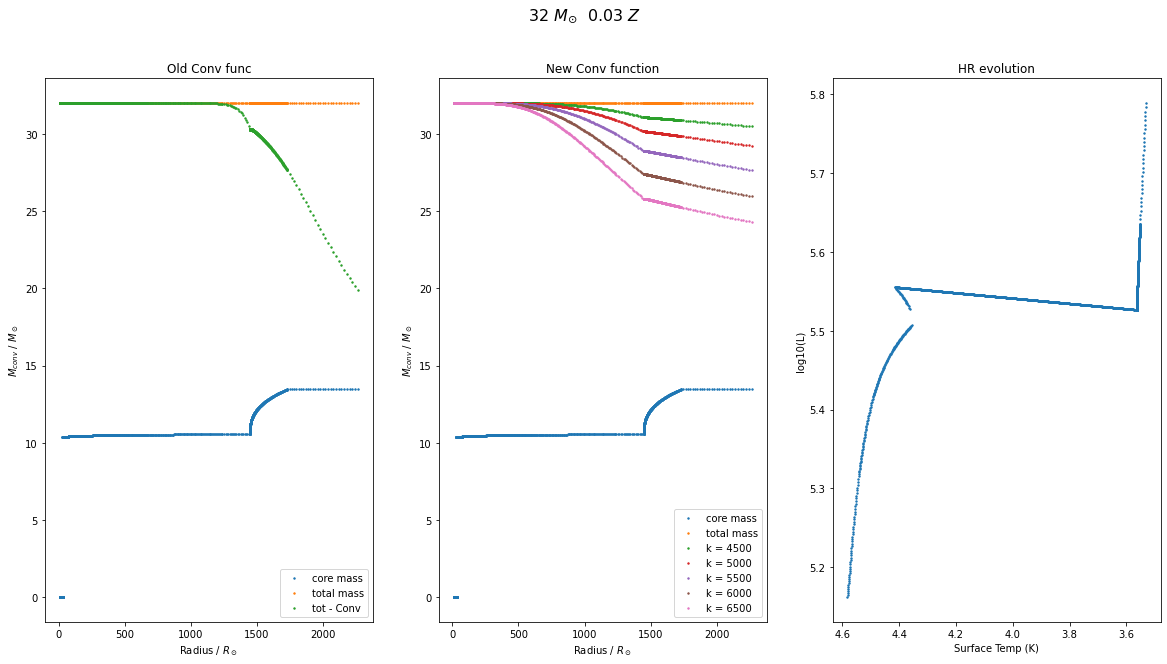

8


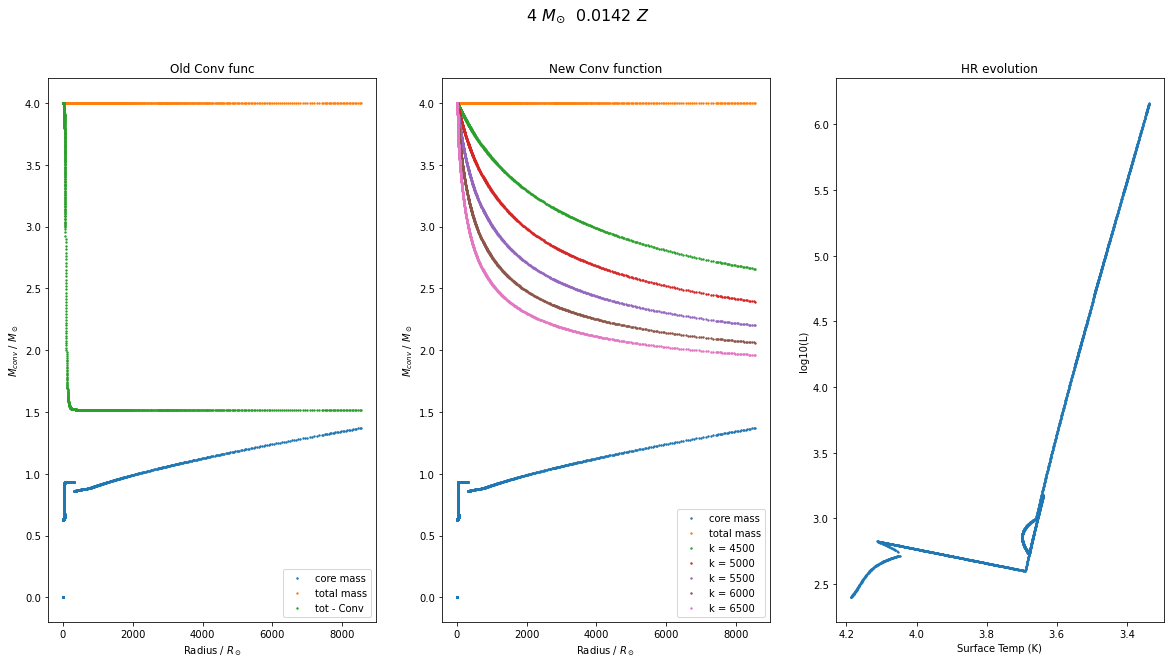

9


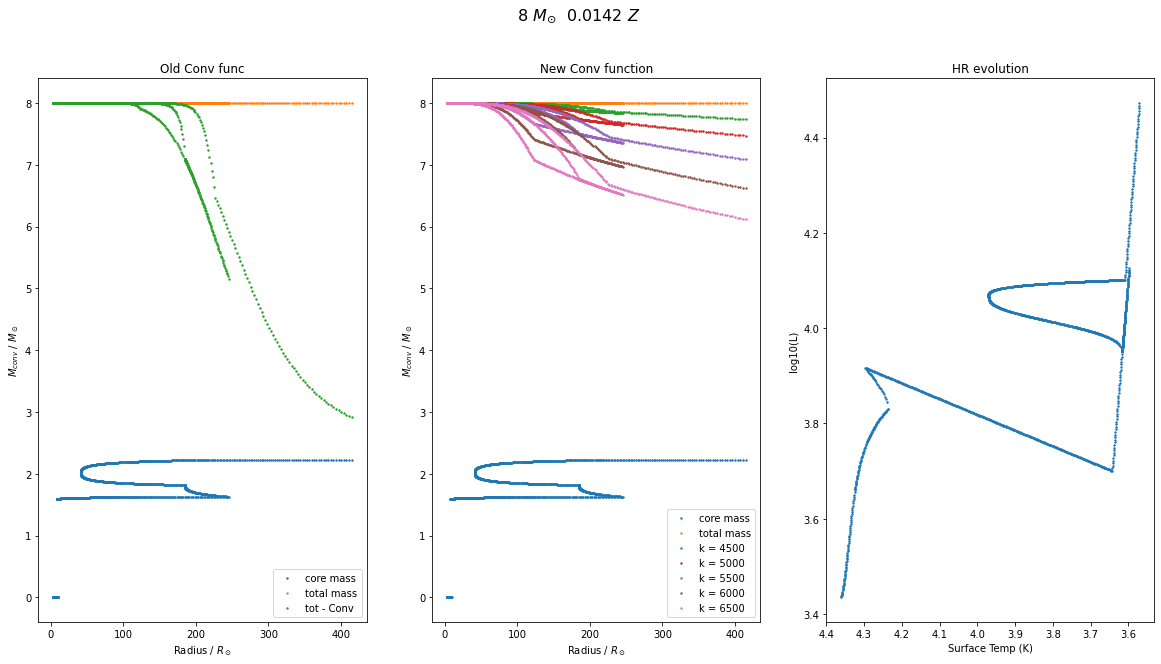

10


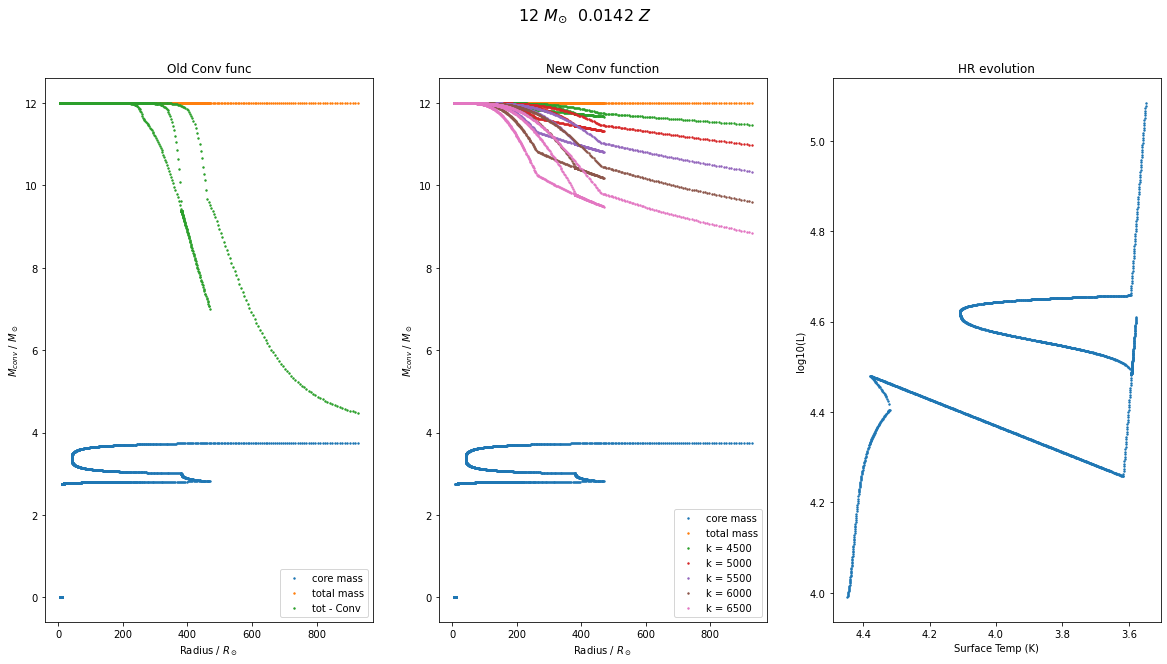

11


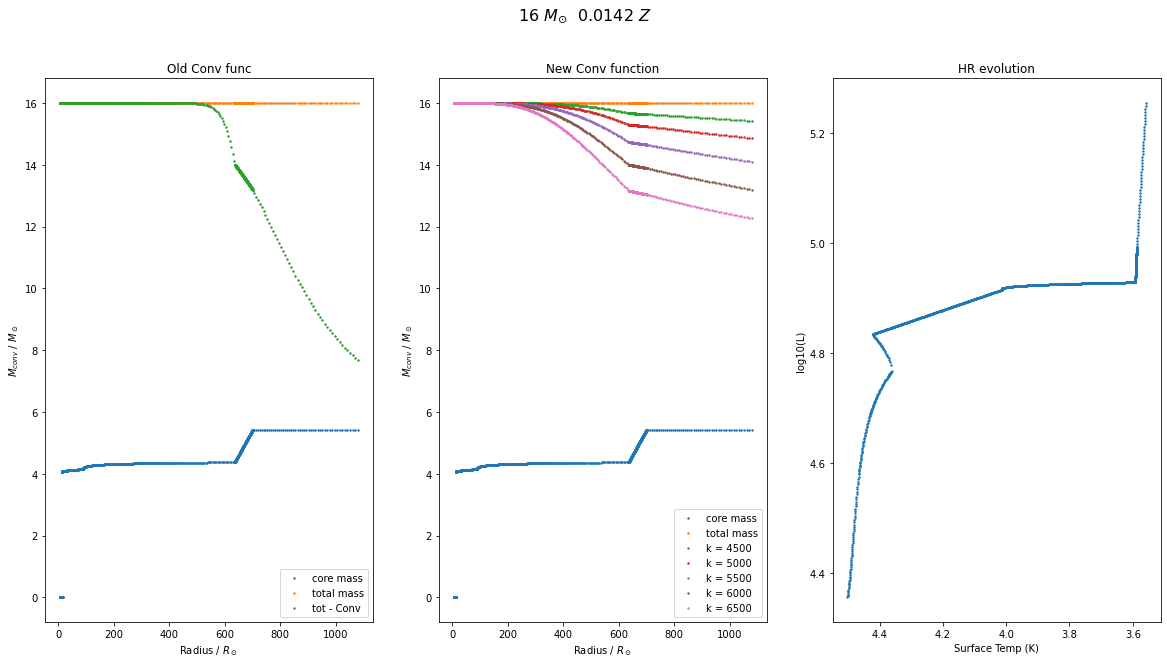

12


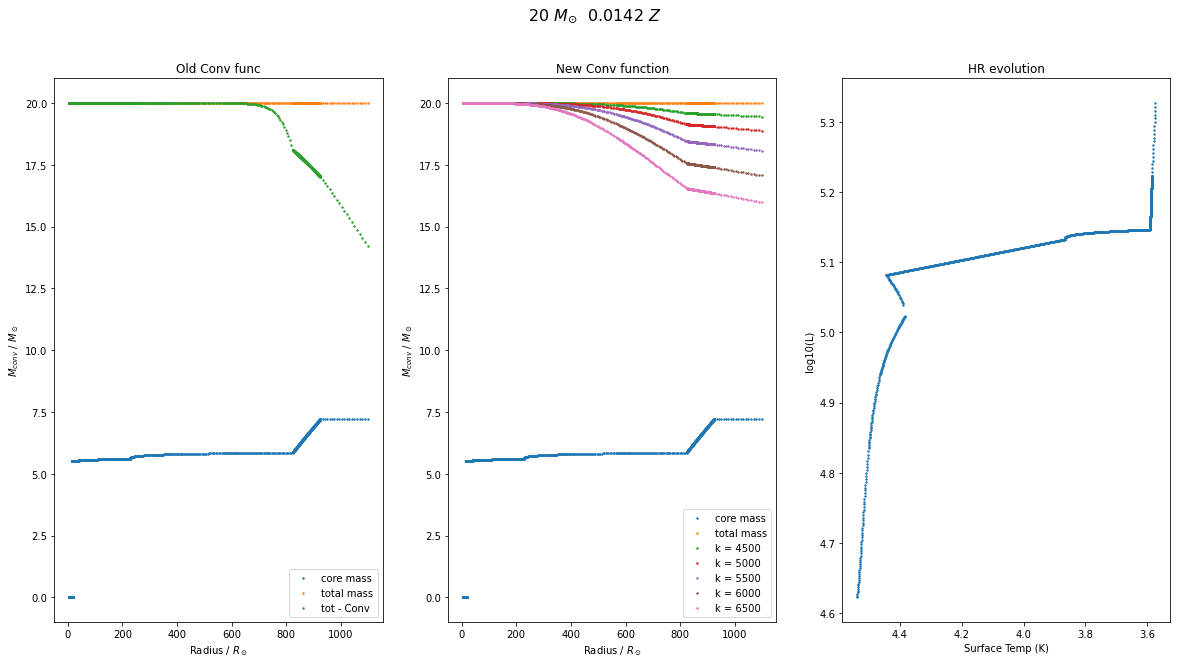

13


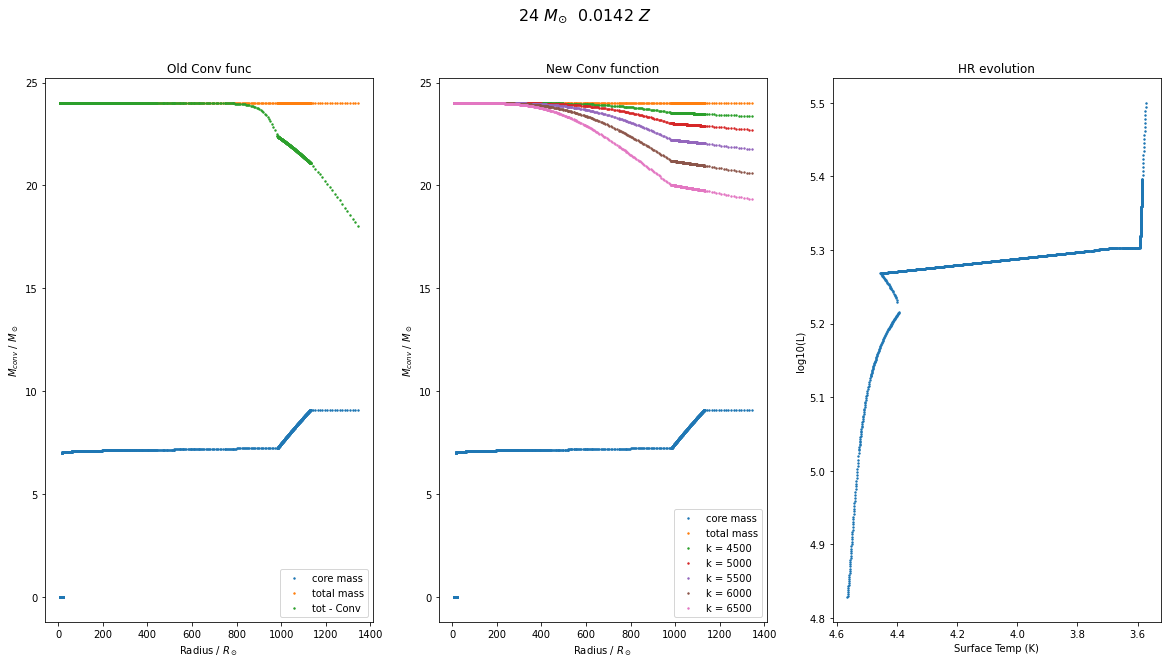

14


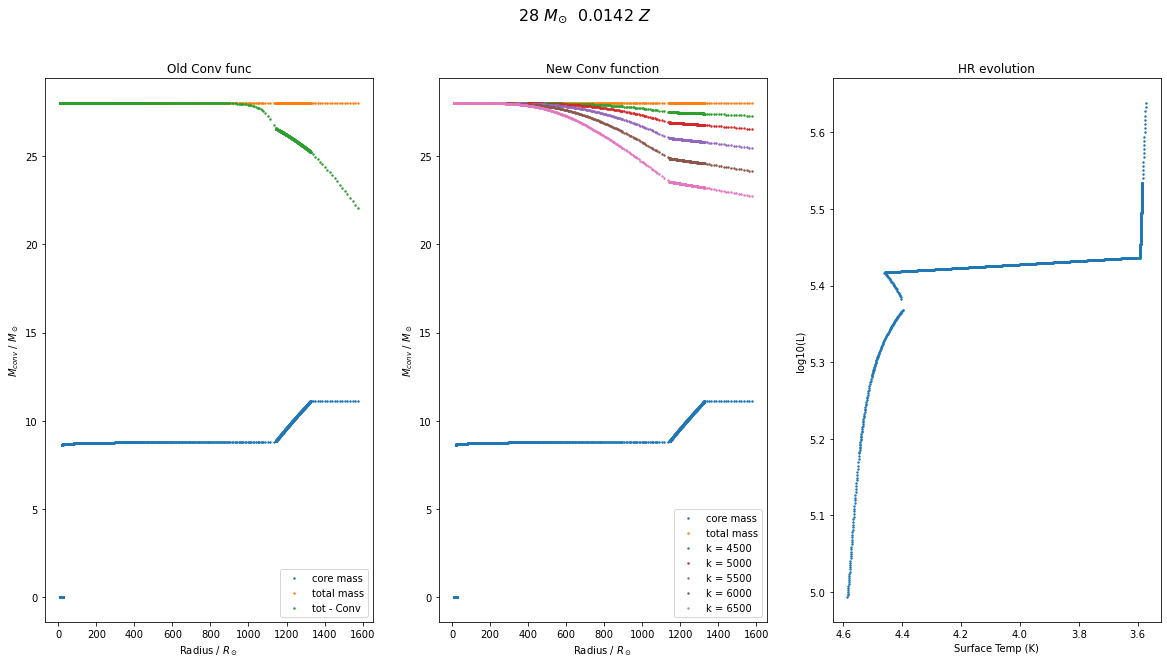

15


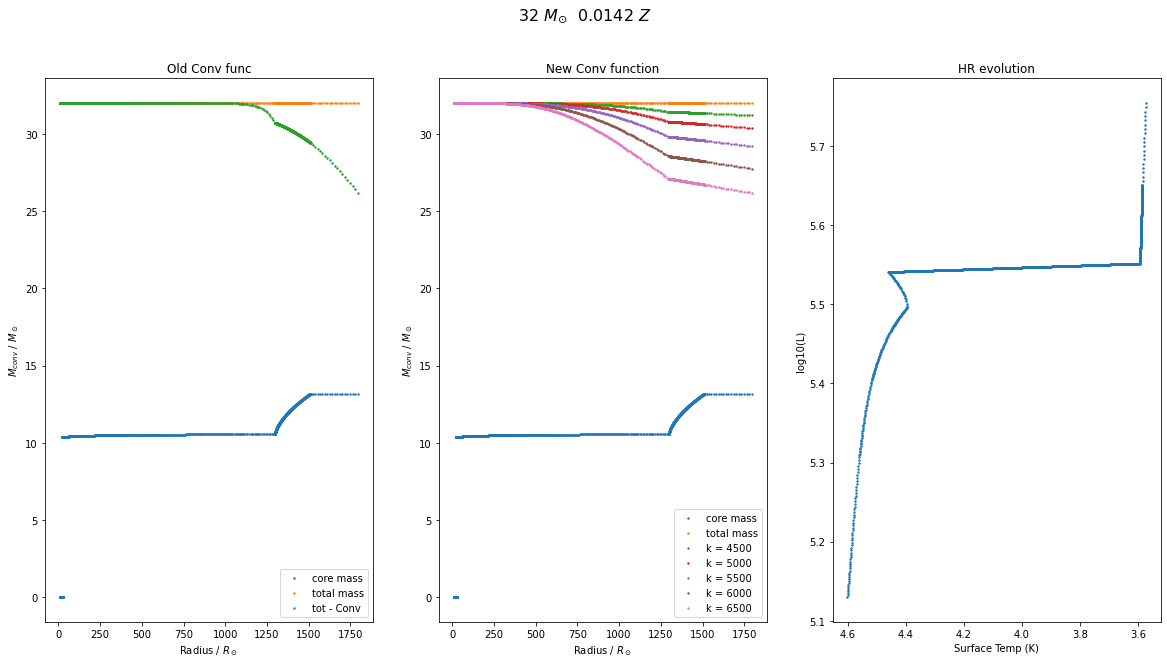

16


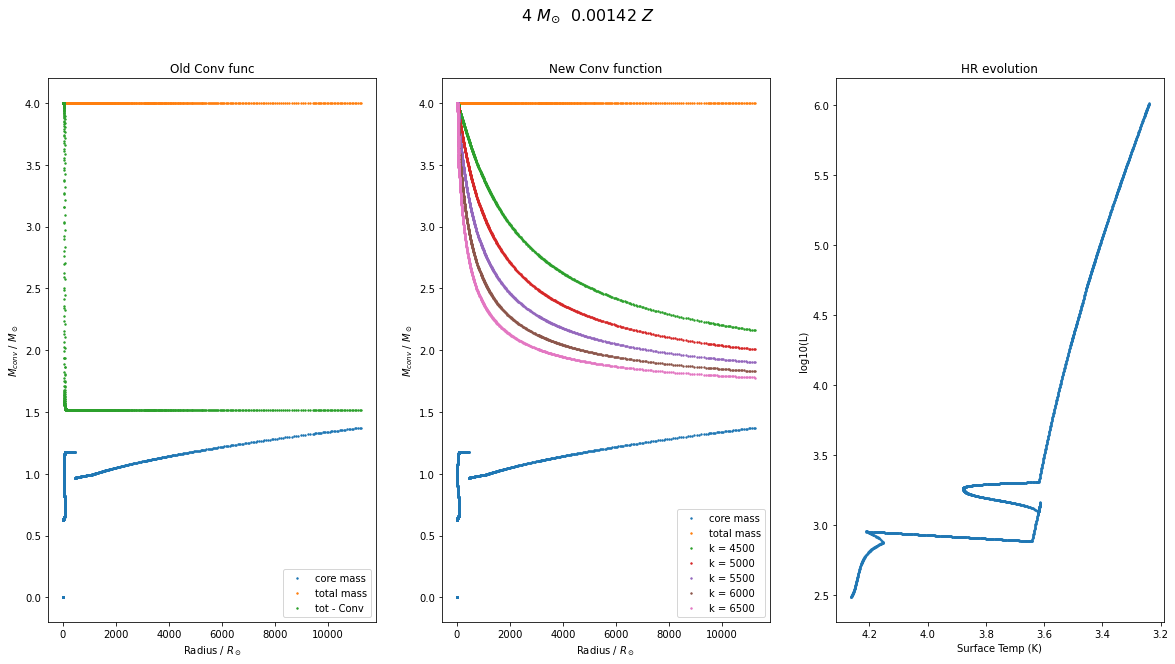

17


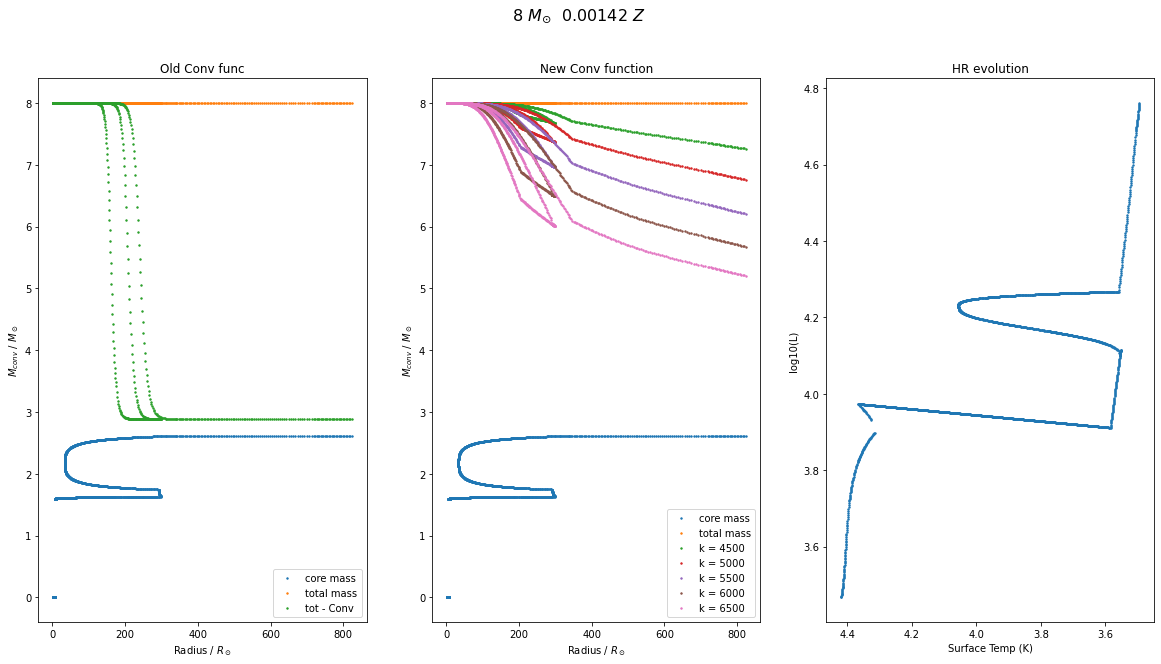

18


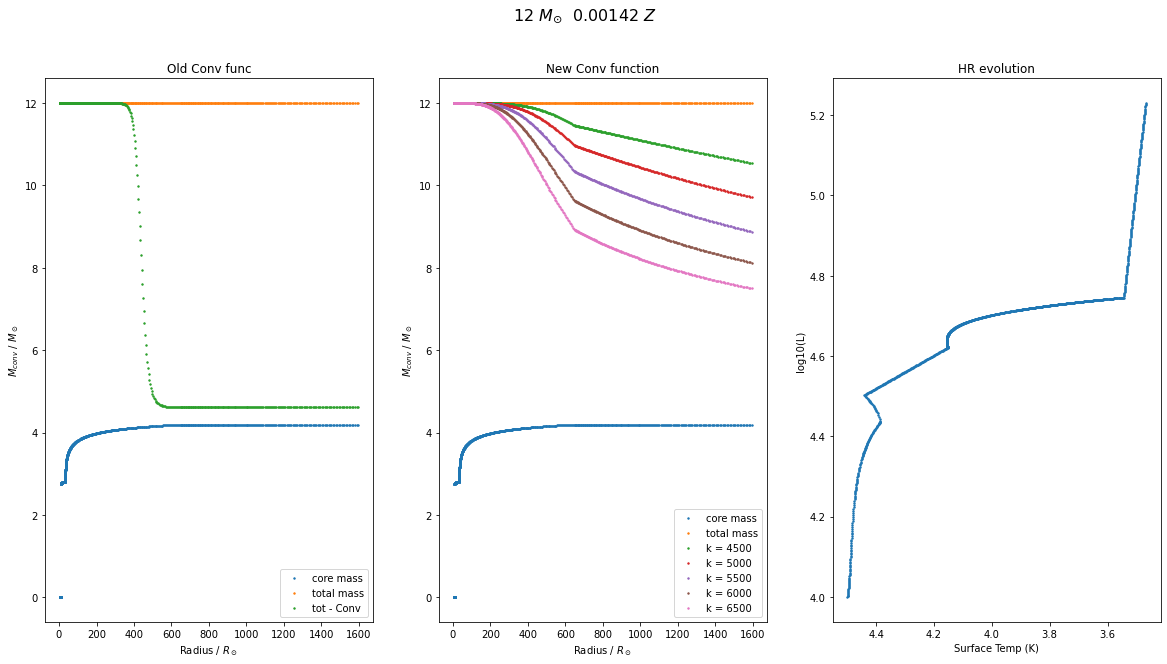

19


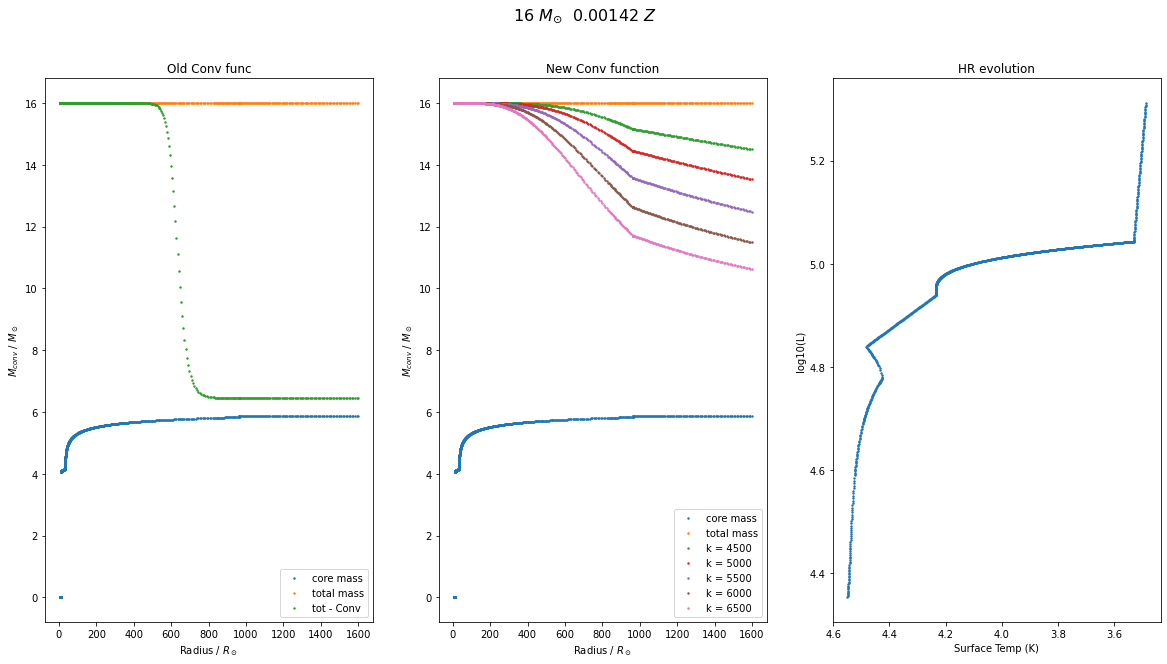

20


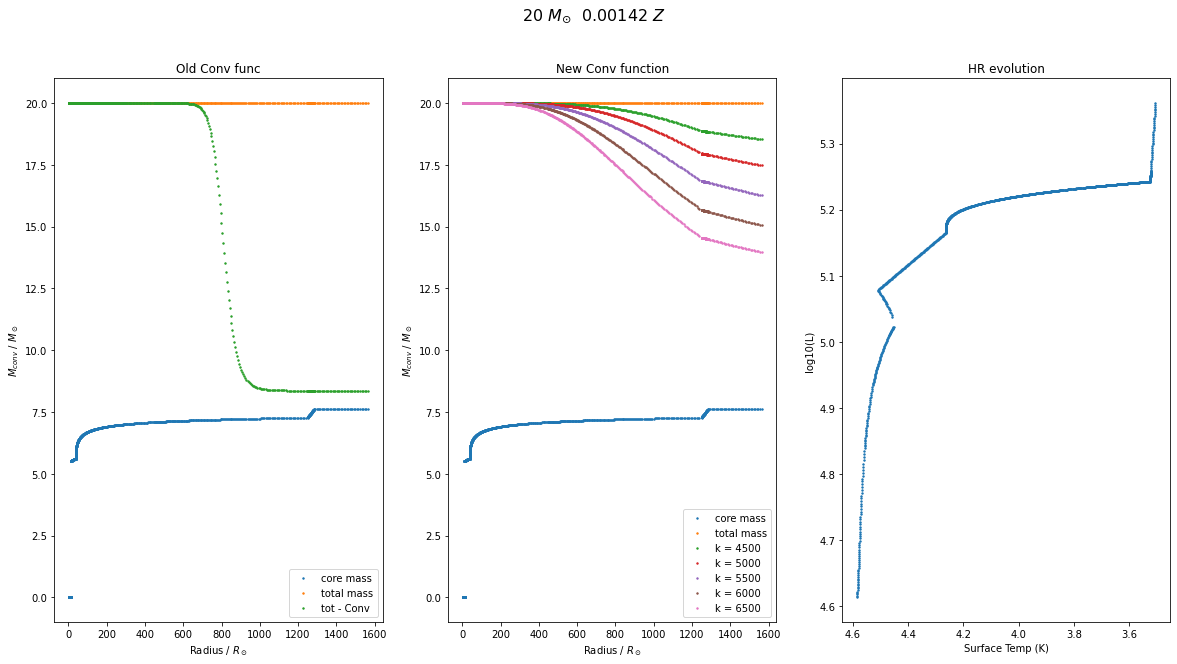

21


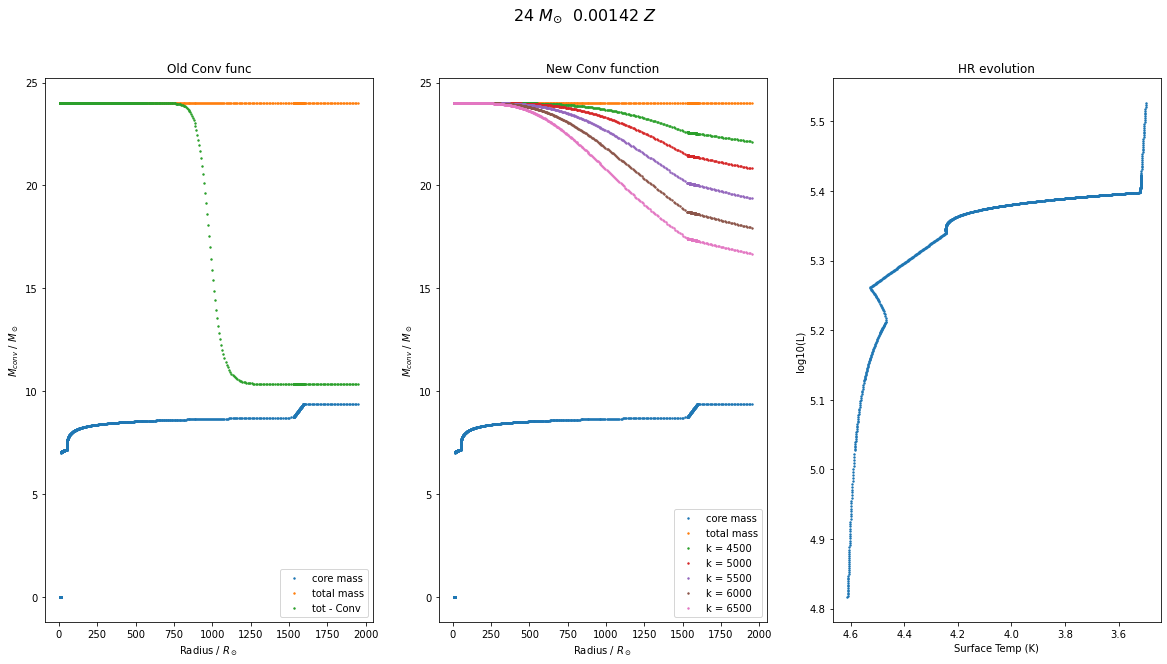

22


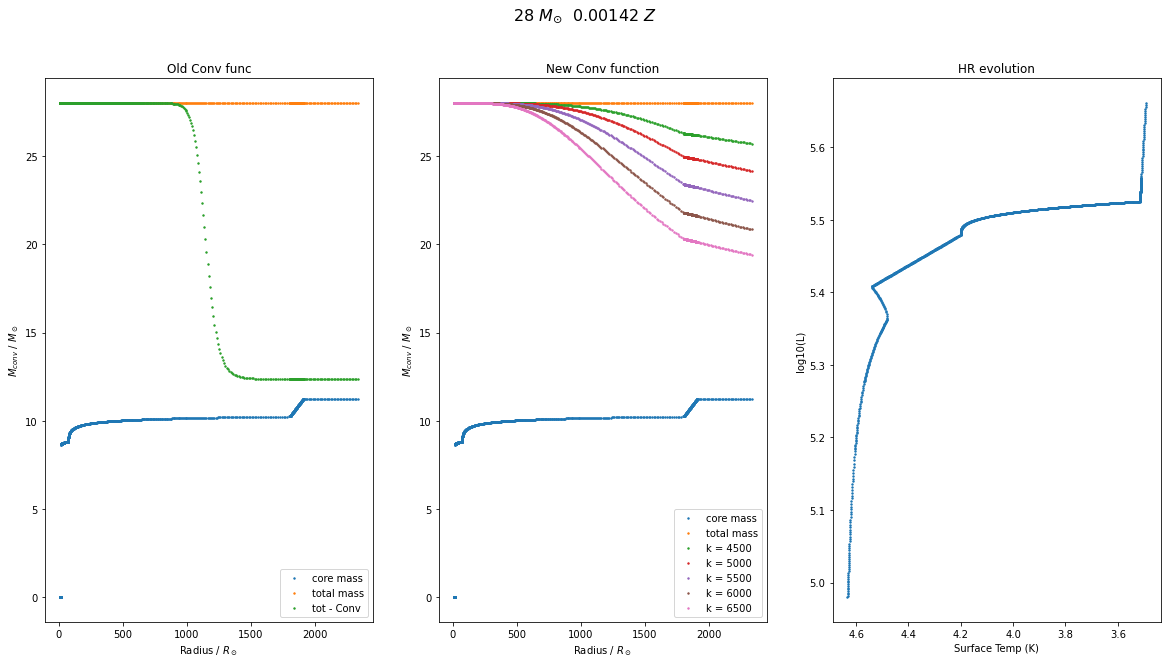

23


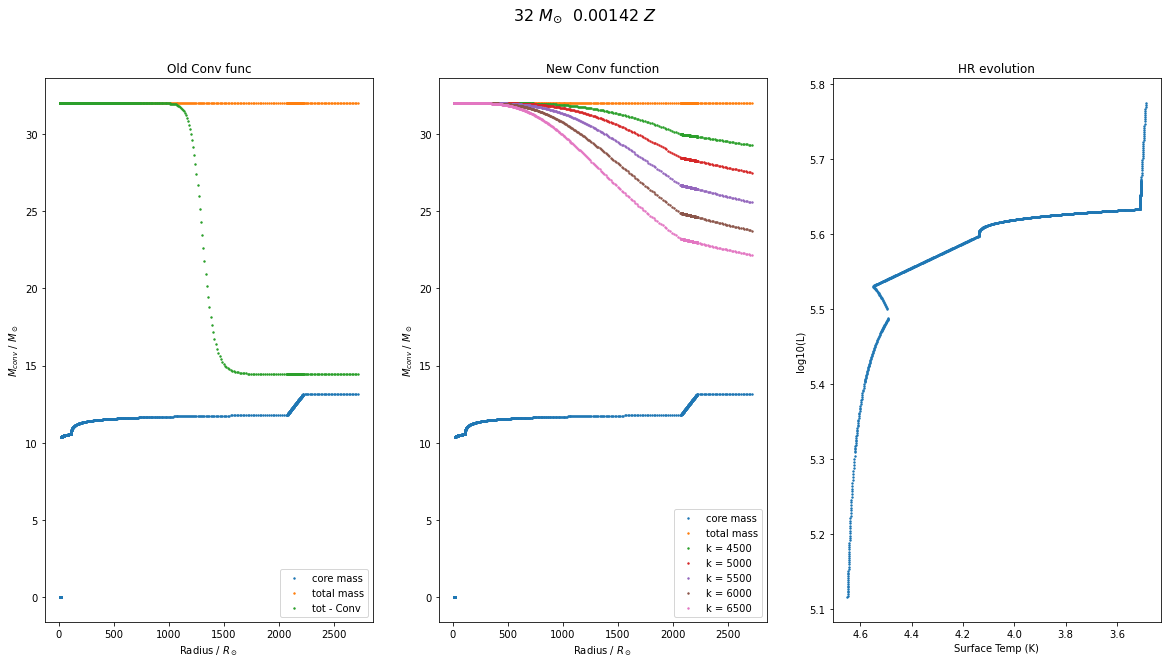

24


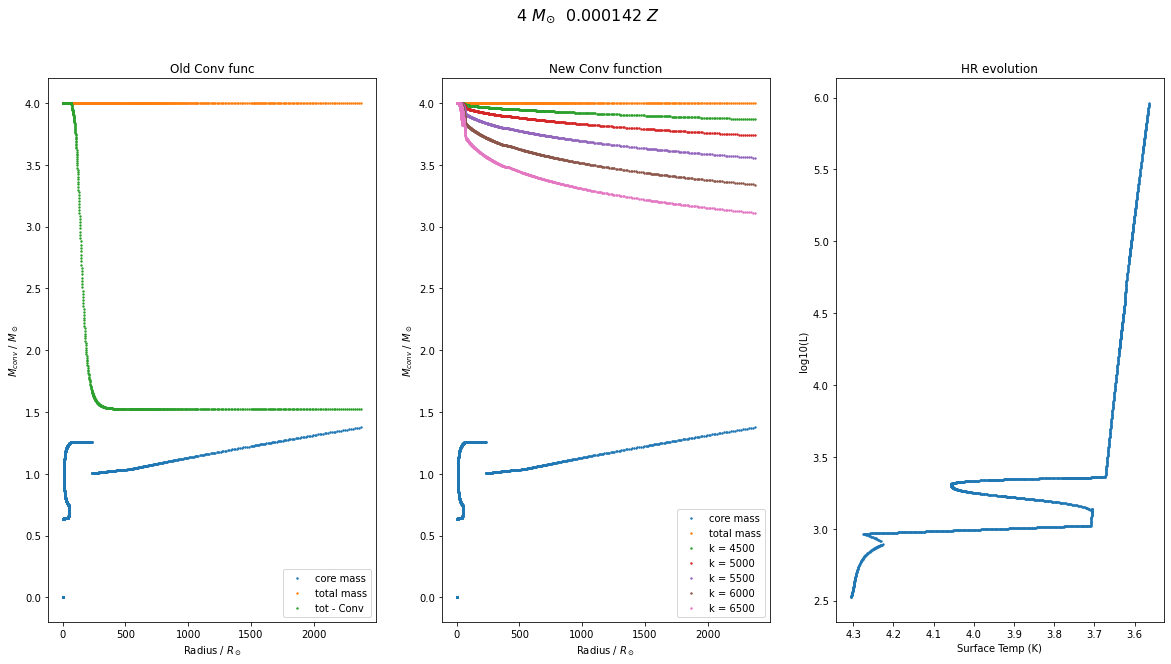

25


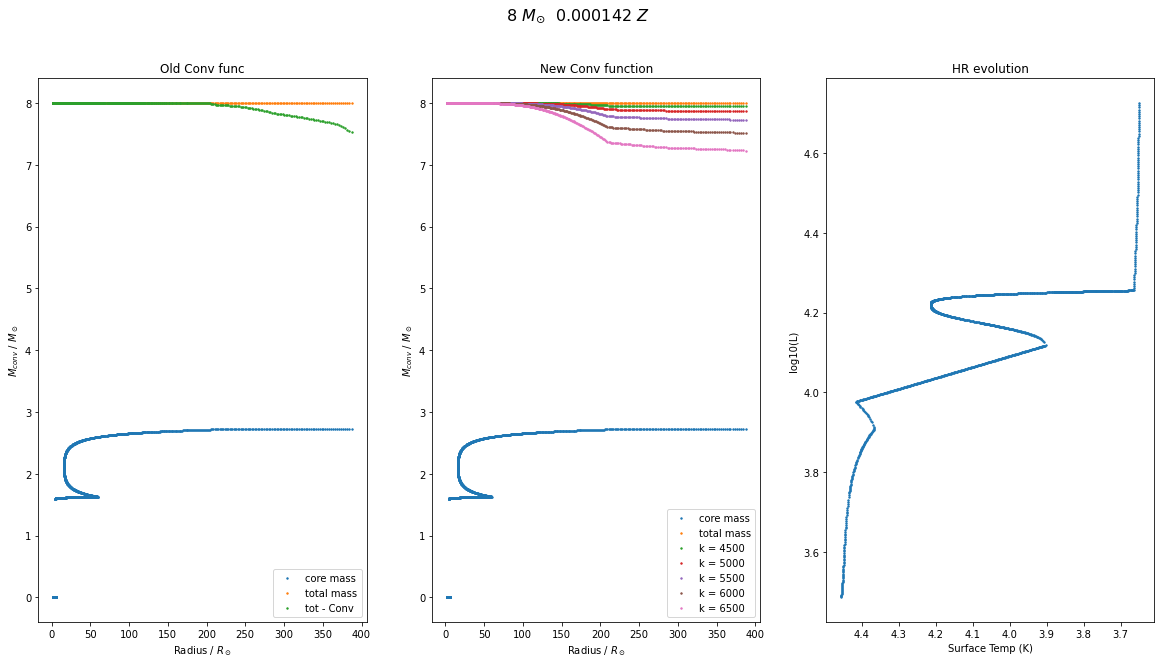

26


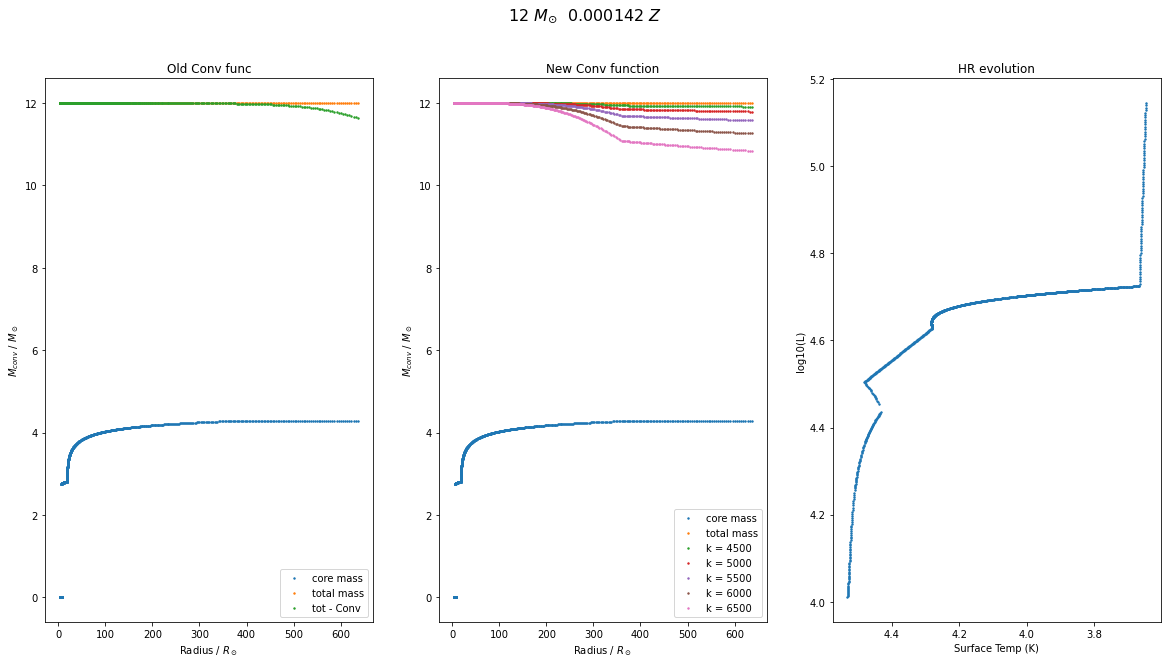

27


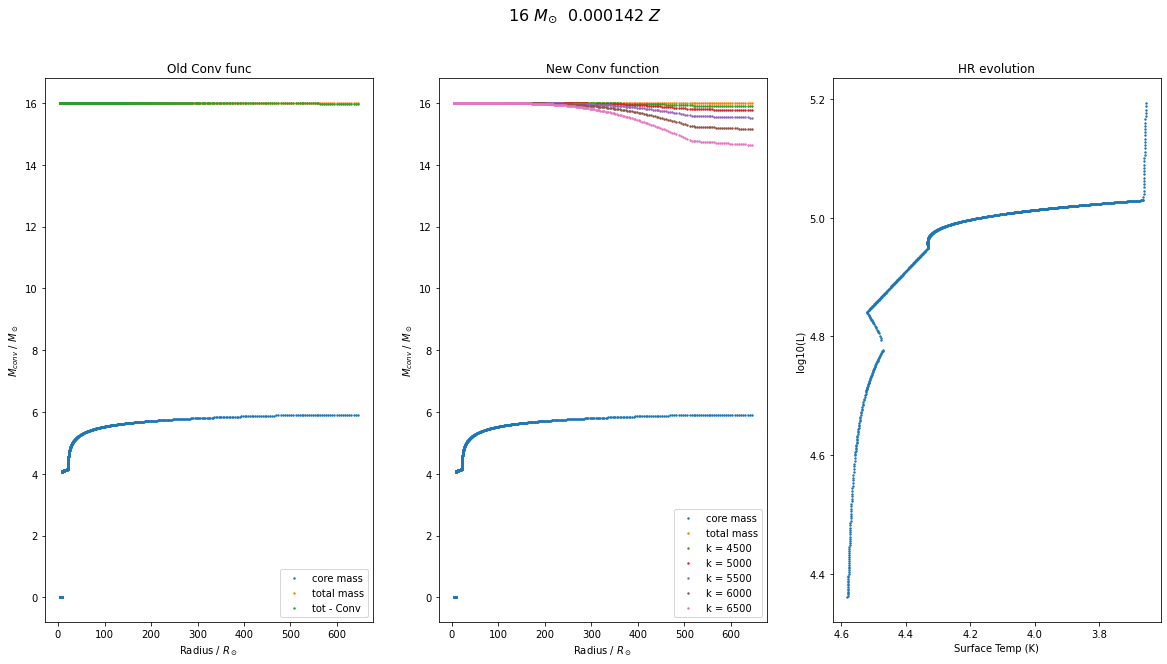

28


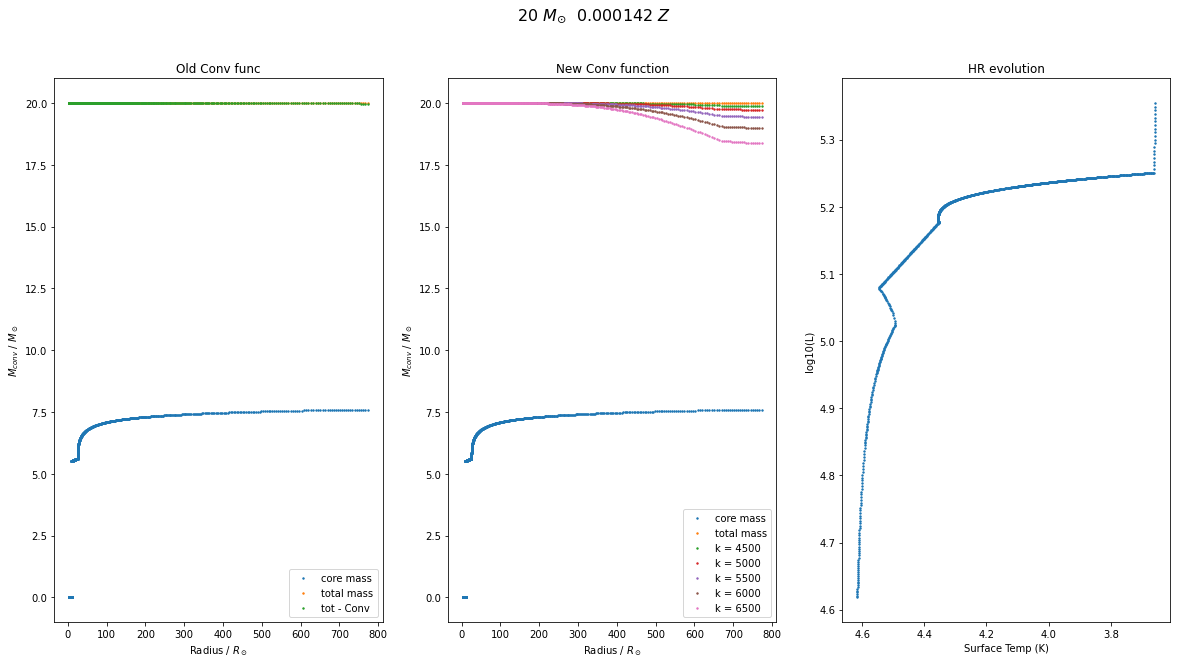

29


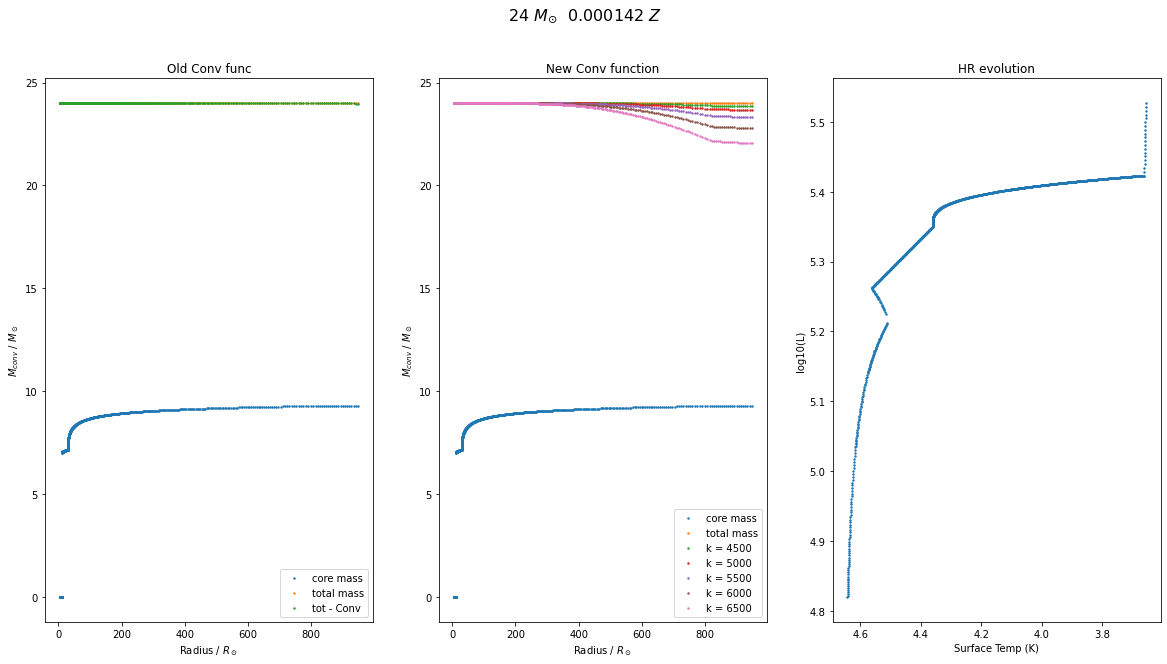

30


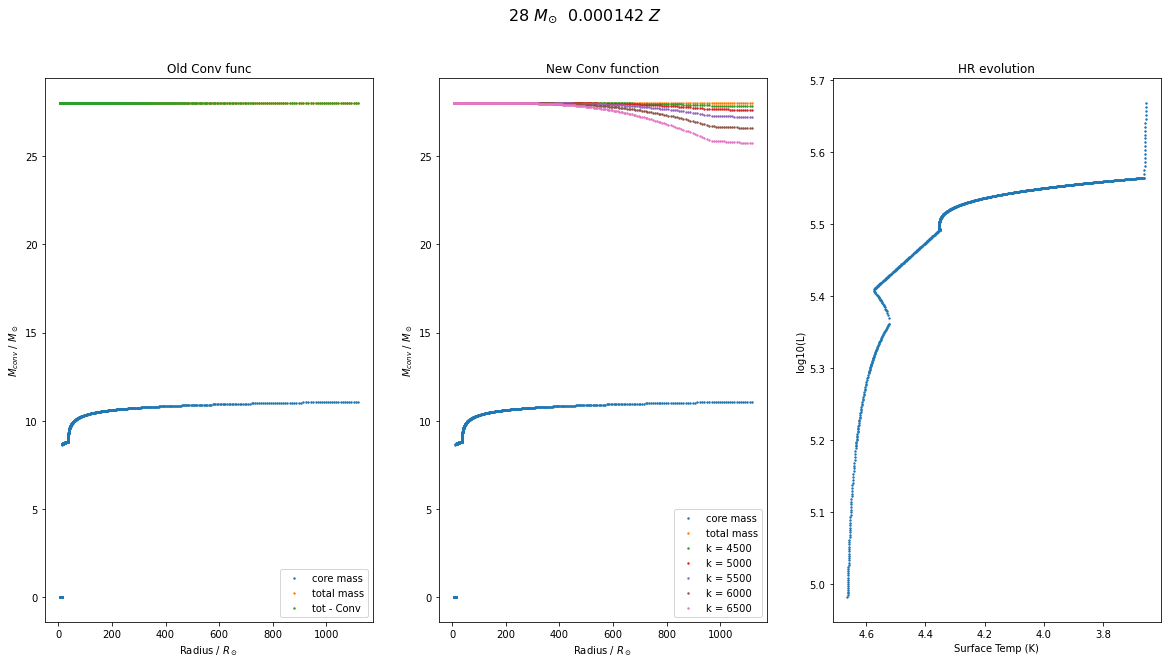

31


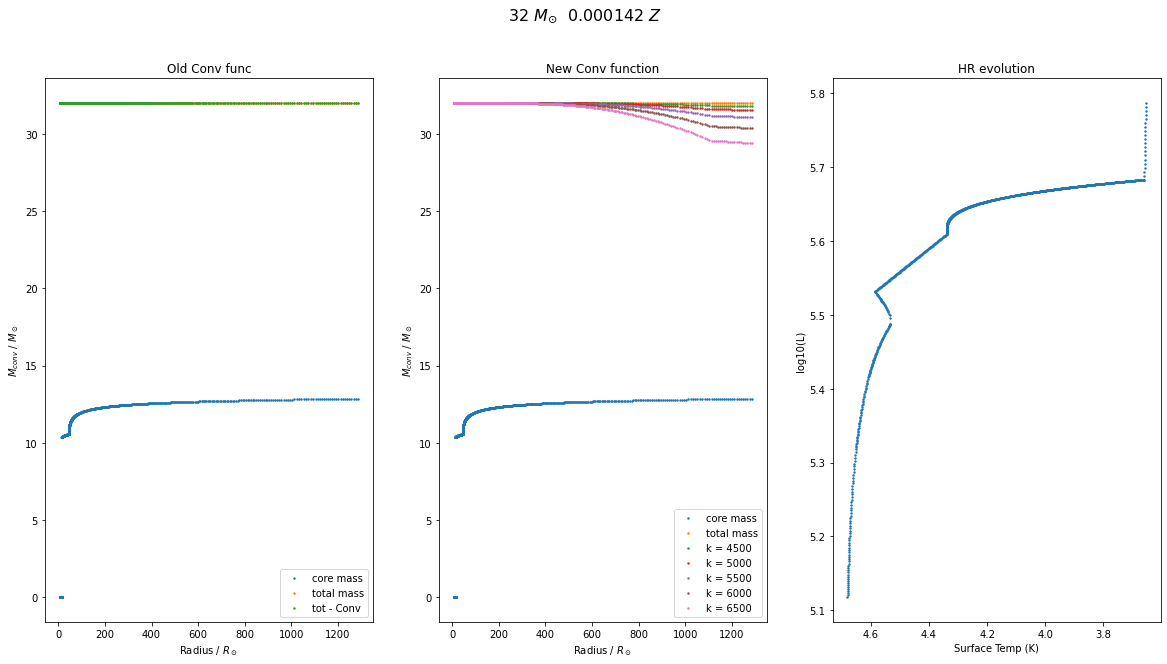

In [10]:
index = np.arange(32)

for i in index: 
    print(i)
    #read in data
    pathToOutput = '/home/lewis/Documents/Honours_Research/COMPAS-dev/utils/preProcessing/COMPAS_Output_1/Detailed_Output/'
    pathToh5 = pathToOutput + 'SSE_Detailed_Output_' + str(i) + '.h5'
    Data = h5.File(pathToh5)
    
    #get values of interest
    z = Data['Metallicity@ZAMS'][()][0]
    M_i = round(Data['Mass'][()][0])

    #parameters of interest
    St = Data['Stellar_Type'][()]
    L = Data['Luminosity'][()]
    Mass = Data['Mass'][()]
    Teff = Data['Teff'][()]
    T_min = min(T_eff)
    radius = Data['Radius'][()]
    M_HEcore = Data['Mass_He_Core'][()]
    
    #Defining points
    idx_TAMS = max(np.where(St==1)[0])
    idx_HG = max(np.where(St==2)[0])

    log_L_TAMS = np.log10(L[idx_TAMS])
    M_core_max = M_HEcore[-2]
    
    #calculating M_conv
    M_conv_max = M_conv_max_func(Mass,M_core_max, gamma)
    T_norm = T_norm_func(log_L_TAMS,a2(z),b2(z),c2(z))
    M_conv = M_conv_func(Teff,T_norm,b1(z),M_conv_max)
    M_conv_n1 = M_conv_new(Teff, 4500, T_min, M_conv_max)
    M_conv_n2 = M_conv_new(Teff, 5000, T_min, M_conv_max)
    M_conv_n3 = M_conv_new(Teff, 5500, T_min, M_conv_max)
    M_conv_n4 = M_conv_new(Teff, 6000, T_min, M_conv_max)
    M_conv_n5 = M_conv_new(Teff, 6500, T_min, M_conv_max)
    
    #I want to stop plotting before the remenant  
    tmp = []
    for val in St:
        if val not in tmp:
            tmp.append(val)

    idx_end = max(np.where(St == tmp[-2])[0])    


    fig, axs = plt.subplots(1, 3,figsize=(20, 10))
    
    axs[0].scatter(radius[:idx_end], M_HEcore[:idx_end], label = 'core mass', s=2)
    axs[0].scatter(radius[:idx_end], Mass[:idx_end], label = 'total mass', s=2 )
    axs[0].scatter(radius[:idx_end],Mass[:idx_end] - M_conv[:idx_end], label = 'tot - Conv', s=2)
    axs[0].set_xlabel('Radius / $R_\odot$')
    axs[0].set_ylabel("$M_{conv}$ / $M_\odot$")
    axs[0].legend()
    
    axs[1].scatter(radius[:idx_end], M_HEcore[:idx_end], label = 'core mass', s=2)
    axs[1].scatter(radius[:idx_end], Mass[:idx_end], label = 'total mass', s=2 )    
    axs[1].scatter(radius[:idx_end],Mass[:idx_end] - M_conv_n1[:idx_end], label = 'k = 4500', s=2)
    axs[1].scatter(radius[:idx_end],Mass[:idx_end] - M_conv_n2[:idx_end], label = 'k = 5000', s=2)
    axs[1].scatter(radius[:idx_end],Mass[:idx_end] - M_conv_n3[:idx_end], label = 'k = 5500', s=2)
    axs[1].scatter(radius[:idx_end],Mass[:idx_end] - M_conv_n4[:idx_end], label = 'k = 6000', s=2)
    axs[1].scatter(radius[:idx_end],Mass[:idx_end] - M_conv_n5[:idx_end], label = 'k = 6500', s=2)

    axs[1].set_xlabel('Radius / $R_\odot$')
    axs[1].set_ylabel("$M_{conv}$ / $M_\odot$")
    axs[1].legend()
    
    axs[2].scatter(np.log10(Teff[:idx_end]), np.log10(L[:idx_end]),s = 2 )
    axs[2].set_xlabel('Surface Temp (K)')
    axs[2].set_ylabel("log10(L)")
    axs[2].invert_xaxis()
    
    
    axs[0].set_title('Old Conv func')
    axs[1].set_title('New Conv function')
    axs[2].set_title('HR evolution')
    
    title  = str(M_i) + ' $M_{\odot}$  ' + str(z) + " $Z$"
    fig.suptitle(title, fontsize=16)
    plt.show()